<a href="https://colab.research.google.com/github/moncykurien/evaluation_projects/blob/main/Project4_HrAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HR Analytics

HR Analytics is a classification problem.

Variable Descriptions:

The dataset contains the following variables.

['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']

## Importing Libraries

In [157]:
import pandas as pd

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import joblib
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

import seaborn as sns
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [3]:
#df = pd.read_csv('./data/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')  #Reading file from Google Colab
data = df.copy()
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


Observations:
1. There are some categorical variables.
2. The target variable is 'Attrition', a categorical variable. This should be approached as a classification problem.

In [4]:
pd.set_option('display.max_rows', df.shape[0]+1)
pd.set_option('display.max_columns', df.shape[1]+1)

In [5]:
data.shape

(1470, 35)

There are 1470 rows and 35 columns.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
print(f"There are {data.dtypes[data.dtypes == 'object'].count()} 'Object' variables and {data.dtypes[data.dtypes != 'object'].count()} 'int64' variables in the dataset.")

There are 9 'Object' variables and 26 'int64' variables in the dataset.


In [8]:
numeric_df = data.select_dtypes(exclude="object")
print(f'The following are the numerical variables in the dataset:\n {numeric_df.columns.values}')

The following are the numerical variables in the dataset:
 ['Age' 'DailyRate' 'DistanceFromHome' 'Education' 'EmployeeCount'
 'EmployeeNumber' 'EnvironmentSatisfaction' 'HourlyRate' 'JobInvolvement'
 'JobLevel' 'JobSatisfaction' 'MonthlyIncome' 'MonthlyRate'
 'NumCompaniesWorked' 'PercentSalaryHike' 'PerformanceRating'
 'RelationshipSatisfaction' 'StandardHours' 'StockOptionLevel'
 'TotalWorkingYears' 'TrainingTimesLastYear' 'WorkLifeBalance'
 'YearsAtCompany' 'YearsInCurrentRole' 'YearsSinceLastPromotion'
 'YearsWithCurrManager']


In [9]:
cat_df = data.select_dtypes(include="object")
print(f'The following are the categorical variables in the dataset:\n {cat_df.columns.values}')

The following are the categorical variables in the dataset:
 ['Attrition' 'BusinessTravel' 'Department' 'EducationField' 'Gender'
 'JobRole' 'MaritalStatus' 'Over18' 'OverTime']


In [10]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no null values in the dataset.

### Discriptive analysis

In [11]:
data.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,Y,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,NaN,882,NaN,NaN,NaN,326,NaN,673,NaN,NaN,NaN,1470,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,2.721769,NaN,65.891156,2.729932,2.063946,NaN,2.728571,NaN,6502.931293,14313.103401,2.693197,NaN,NaN,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,1.093082,NaN,20.329428,0.711561,1.106940,NaN,1.102846,NaN,4707.956783,7117.786044,2.498009,NaN,NaN,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,2094.000000,0.000000,NaN,NaN,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,2.000000,NaN,48.000000,2.000000,1.000000,NaN,2.000000,NaN,2911.000000,8047.000000,1.000000,NaN,NaN,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,4919.000000,14235.500000,2.000000,NaN,NaN,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,4.000000,NaN,83.750000,3.000000,3.000000,NaN,4.000000,NaN,8379.000000,20461.500000,4.000000,NaN,NaN,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


Observations:
1. AGE: The age range of the employees in this dataset is 18 to 60. The data seem to be close to Gaussian distribution with a very slight skew towards the right.
2. Attrition: The attrition variable has 2 categories and the 'No' category is occuring 1233 times out of 1470. It means that we have an imbalanced dataset with respect to the target variable. This is expected in a healthy environment because the employees leaving the company will be very less when compared to employees staying in the company.
3. BusinessTravel: It contains 3 categories. 'Travel_Rarely' occurs 1043 times out of 1470. We are looking at another expected imbalanced variable.
4. DailyRate: The DailyRate is close to a Gaussian distribution. It is ranging between 403.5 and 1499.
5. Department: There are 3 departments in this dataset. Most of the employees are in the Research & Development department.
6. DistanceFromHome: The distance variable is ranging from 1 to 29. About 25% of the employees stay within 2 kms, 50% of the employees stay within 7 kms from the office. Assuming the unit is km. About 25% of the employees are staying atleast 14 kms away from the office.
7. Education: It ranges from 1 to 5. This looks like a discrete variable, which can be ordered.
8. EducationField: There are 6 categories in this variable. Life Sciences is the most frequent data.
9. EmployeeCount: Looks like the only value in this is 1.This wont be helpful for the analysis.
10. EmployeeNumber: This ranges from 1 to 2068. This is probably unique for each employee.
11. EnvironmentSatisfaction: This is a discrete variable ranging from 1 to 4. About 25% of the employees seem to rate the EnvironmentSatisfaction as 1 or 2.

12. Gender has Male and Female.
13. HourlyRate: Ranges from 30 to 100. The distribution seem to be close to normal.
14. JobInvolvement: This is a discrete data ranging from 1 to 4.
15. JobLevel: A Discrete variable ranging from 1 to 5.
16. JobRole : There are 9 categories in Job Role. Most employees in this dataset are Sales Executives.
17. JobSatisfaction: This is a discrete variable ranging from 1 to 4. Atleast 25% of the employees are not satisfied with their job.
18. MaritalStatus: There are 3 categories in Marital status. Most of the employees are Married.
19. MonthlyIncome: Monthly Income ranges from 1009 to 19999. 50% of the employees get a monthly income of between 2911 and 8379. 25% of employees are getting below 2911 and 50% employees are getting above 4919. This variable's distribution is skewd towards the right and is not normaly distributed.
20. MonthlyRate: This ranges from 2094 to 26999. The distribution is close to normal. About 50% of the employees have Monthly rate > 14235.
21. NumCompaniesWorked: This is a discrete variable ranging from 0 to 9.
22. Over18: All employees are over 18 years. This variable is not helpful.
23. OverTime: There are 2 categories. Yes and No. Most employees do not do overtime.
24. PresentSalaryHike: The values range from 11 to 25. These may not be continuous values.
25. PerformanceRating: This is a discrete variable with values as 3 and 4. Atleast 75% of the employees are rates as 3.
26. RelationshipSatisfaction: A Discrete variable ranging from 1 to 4. Most employees seem to be very satisfied.
27. StandardHours: All values seem to be 80 here.Need to investigate.

28. StockOptionLevel: This is a Discrete variable ranging from 0 to 3.Only 50% of the employees seem to have atleast 1 stock option level.
29. TotalWorkingYears: There are employees with total experience ranging from 0 to 40 years.
30. TrainingTimesLastYear: Discrete variable ranging from 0 to 6. About 75% of the employees have had some training hours last year.
31. WorkLifeBalance: Discrete variable ranging from 1 to 4. Atleast 25% of the employees have rated that their work life balance is less than 3.
32. YearsAtCompany: There are employees with a tenure of 0 to 40 years in the same company. The data is right skewed.
33. YearsInCurrentRole: The values are ranging from 0 to 18 years. Atleast 50% of the employees are in their currect Role for 3 to more years.
34. YearsSinceLastPromotion: Ranges from 0 to 15.
35. YearsWithCurrManager: Ranges from 0 to 17.. Atleast 50% of the employees have the same manager for more than 2 years.

### Data Analysis

Checking the skewness for the variables

In [12]:
data.agg(['skew','kurtosis'])

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
skew,0.413286,-0.003519,0.958118,-0.289681,0,0.016574,-0.321654,-0.032311,-0.498419,1.025401,-0.329672,1.369817,0.018578,1.026471,0.821128,1.921883,-0.302828,0,0.968980,1.117172,0.553124,-0.55248,1.764529,0.917363,1.984290,0.833451
kurtosis,-0.404145,-1.203823,-0.224833,-0.559115,0,-1.223179,-1.202521,-1.196398,0.270999,0.399152,-1.222193,1.005233,-1.214956,0.010214,-0.300598,1.695939,-1.184814,0,0.364634,0.918270,0.494993,0.41946,3.935509,0.477421,3.612673,0.171058


Observations:
1. The DistanceFromHome, JobLevel, MonthlyIncome, NumCompaniesWorked, PercentSalaryHike, PerformanceRating, StockOptionLevel, TotalWorkingYears, YearsAtCompany, YearsinCurrentRole, YearsSinceLastPromotion and YearsWithCurrManager variables have a skewness of +/- 0.5.
2. MonthlyIncome, PerformanceRating, TotalWorkingYears, YearsAtCompany, YearsSinceLastPromotion have large Kurtisis indicating heavy tails.

Looking at the Target variable.

In [13]:
data['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [14]:
print(f'The Attrition rate is {round((data["Attrition"].value_counts()[1]/data["Attrition"].value_counts().sum())*100,2)}%.')

The Attrition rate is 16.12%.


1. The attrition seem to be high. Usually a company tries to keep it under 12%.
2. We need to approach this problem with the class imbalance in mind. The imbalance is expected in this case since the attrition will be less that current employees' count.

Number of unique values in the numeric variables

In [15]:
numeric_df.nunique()

Age                           43
DailyRate                    886
DistanceFromHome              29
Education                      5
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobSatisfaction                4
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithCurrManager          18
dtype: int64

Observations:
1. Except the variables DailyRate, EmployeeNumber, MonthlyIncome and MonthlyRate the others are discrete variables.
2. The DailyRate, MonthlyIncome and MonthlyRate may have some impact on the attrition rate. It will be further investigated.

Number of Unique values in the Categorical variable.

In [16]:
cat_df.nunique()

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64

Observations:
1. The Attrition, Gender and OverTime have 2 categories each.
2. BusinessTravel, Department and MaritalStatus have 3 categories each.
3. There are 9 jobRoles and 6 EducationFields in the dataset.
4. The Over18 has only one values. So this variable should be dropped.

Distribution of the numerical Features.

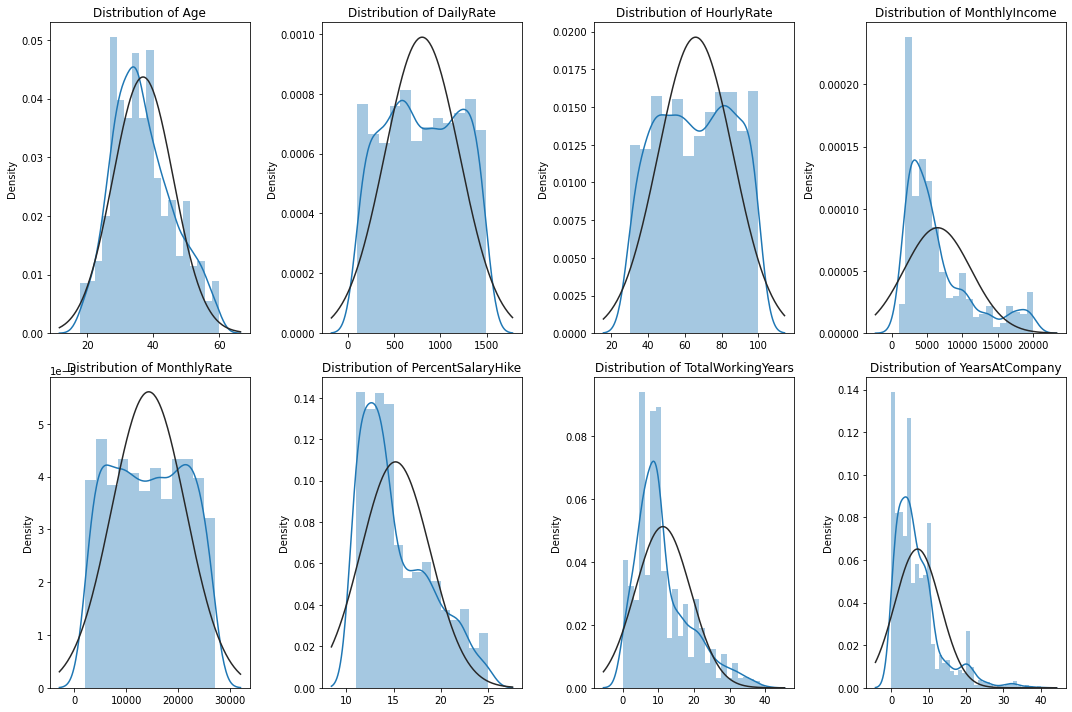

In [18]:
f,ax = plt.subplots(2,4,figsize=(15,10))
f.tight_layout()
columns=['Age','DailyRate','HourlyRate','MonthlyIncome','MonthlyRate','PercentSalaryHike','TotalWorkingYears','YearsAtCompany']
i,j = 0,0
for col in columns:
    graph = sns.distplot(data[col],fit=norm, ax=ax[i,j])
    graph.set(xlabel=None)
    ax[i,j].set_title(f'Distribution of {col}')
    plt.tight_layout()
    
    j+=1
    if j%4==0:
        i+=1
        j=0

Observations:
1. Most of the distribution of the employees data are between the Age group 25 to 40. This is close to a Normal distribution.
2. The DailyRate, HourlyRate and MonthlyRate do not have a normal distribution.
3. The MonthlyIncome. PercentSalaryHike, TotalWorkingYears and YearsAtCompany show a positive skew in their distributions.

Frequency of Categorical features

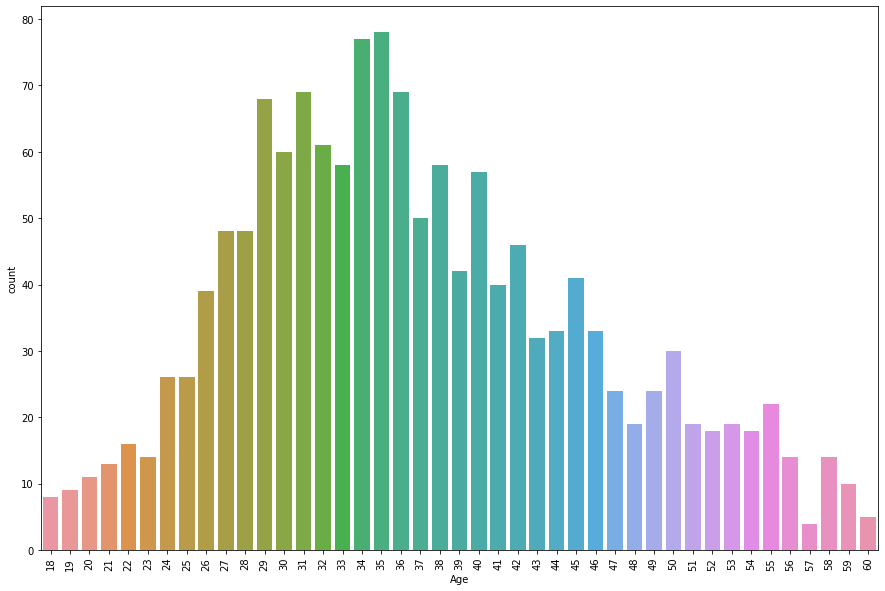

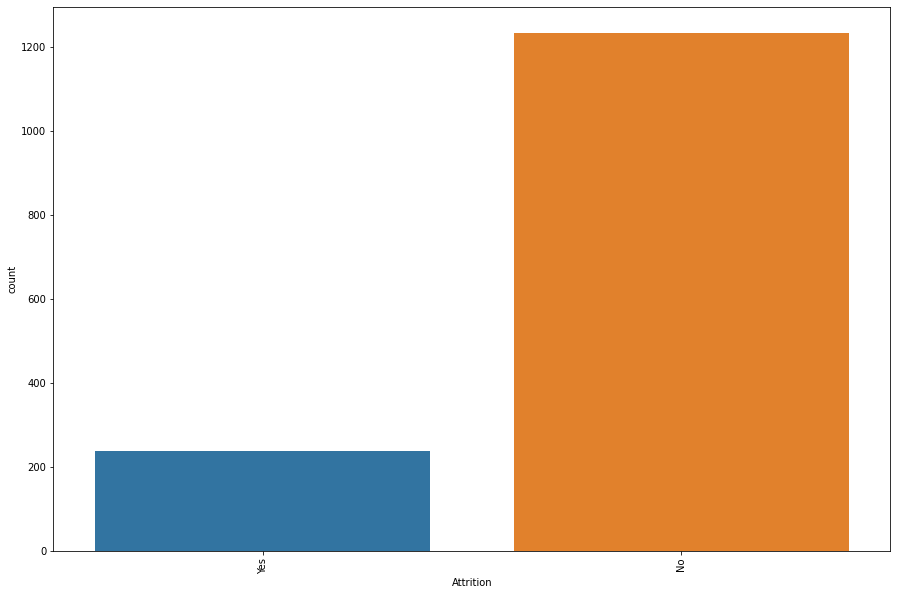

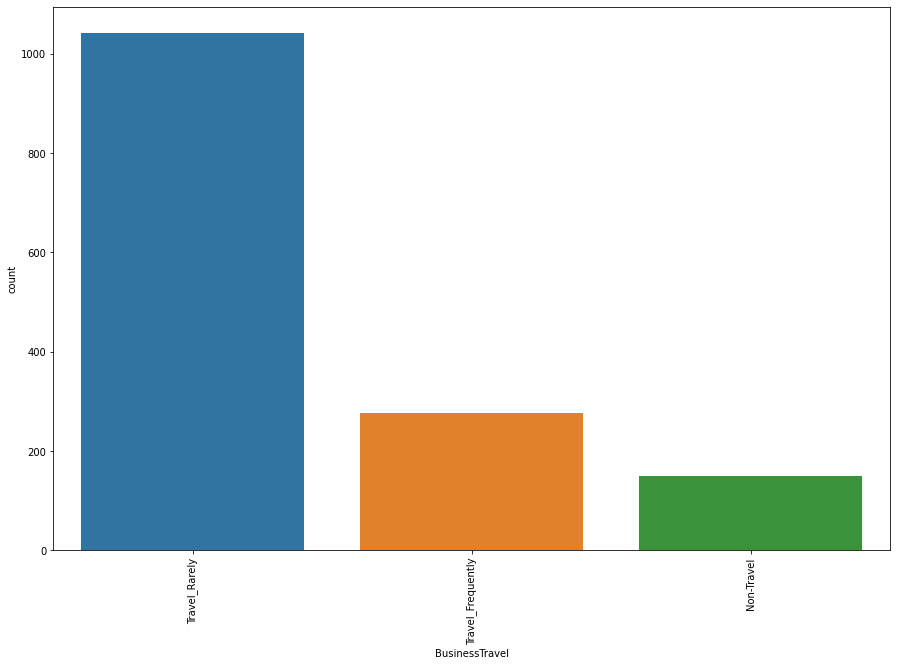

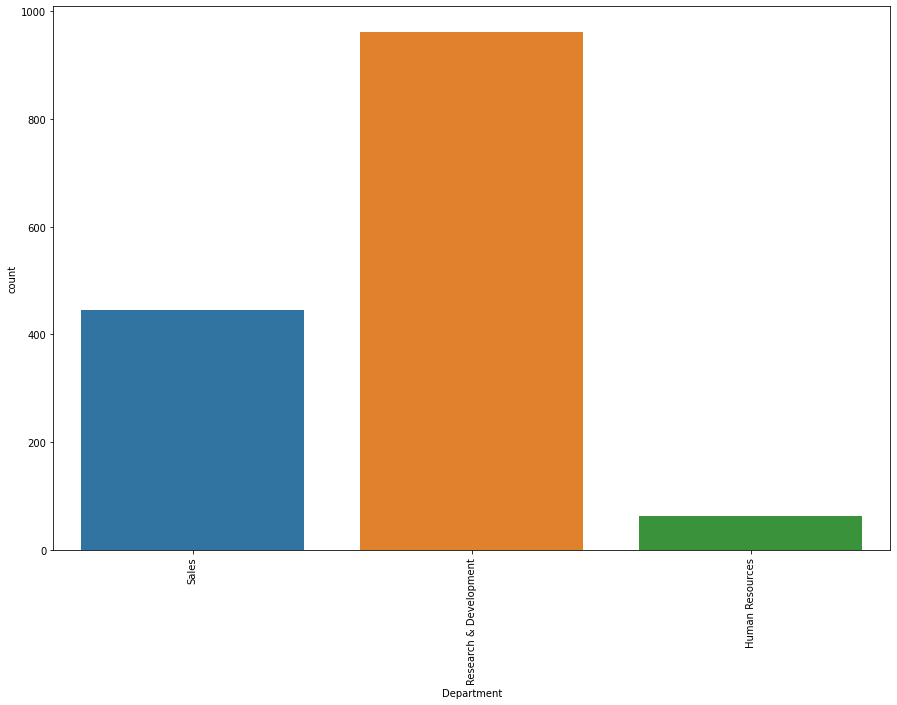

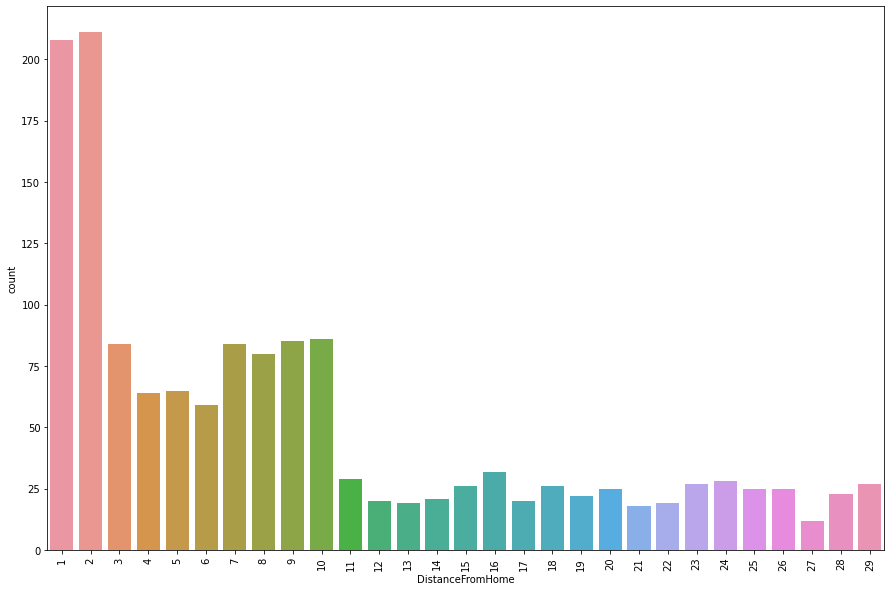

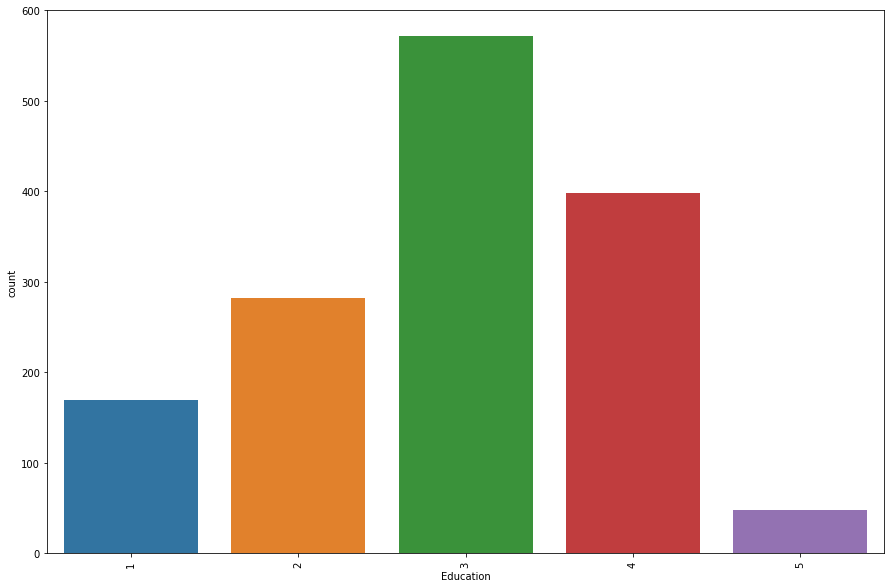

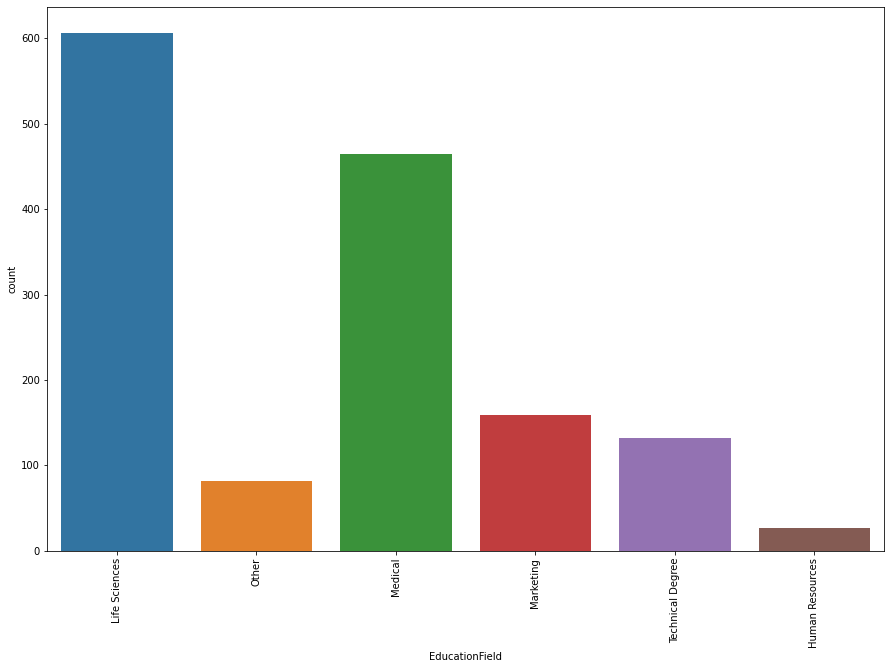

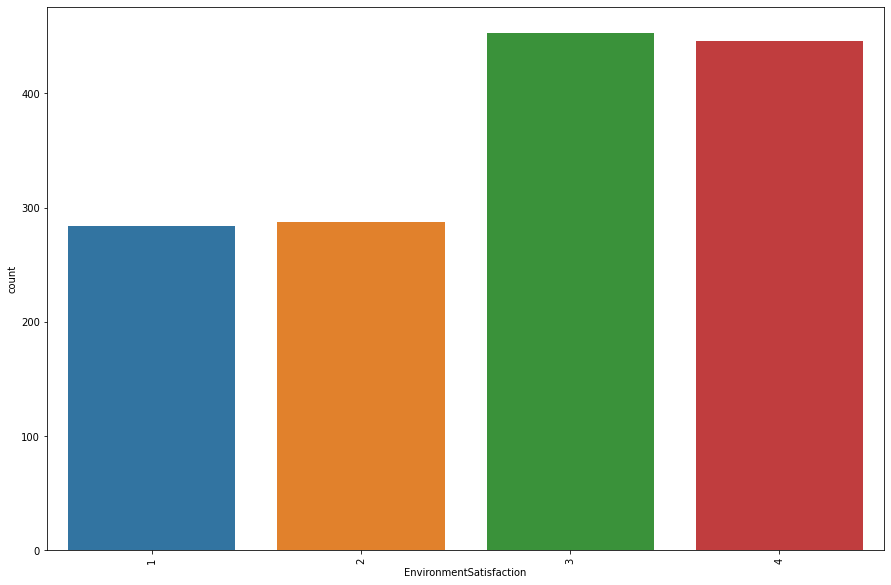

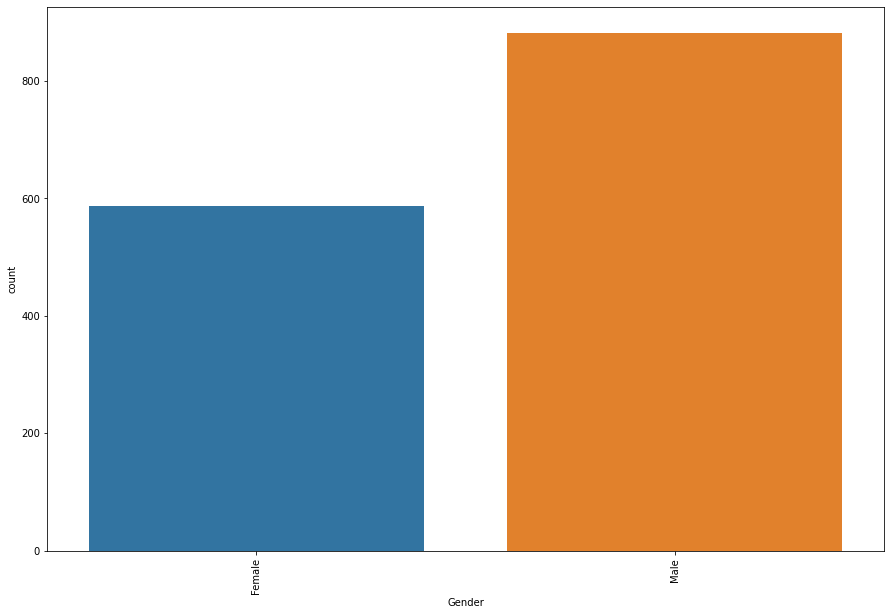

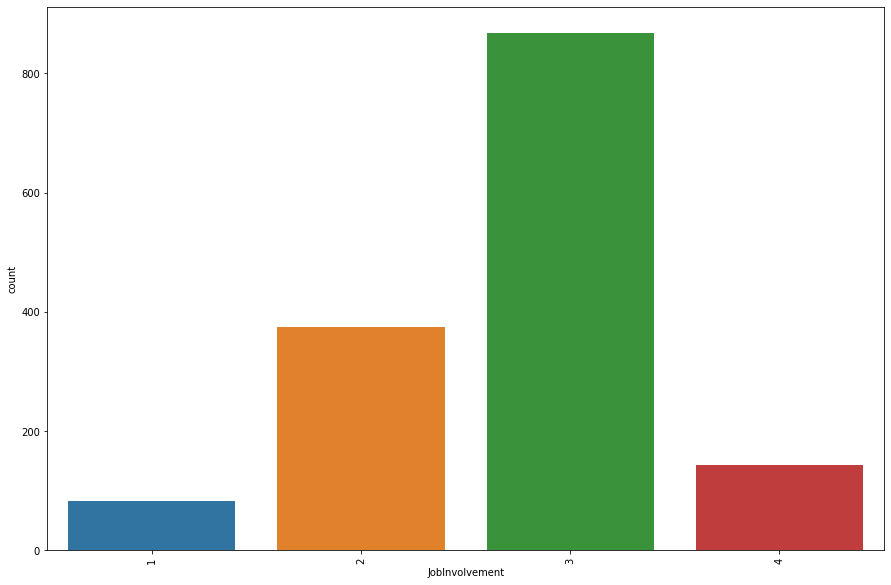

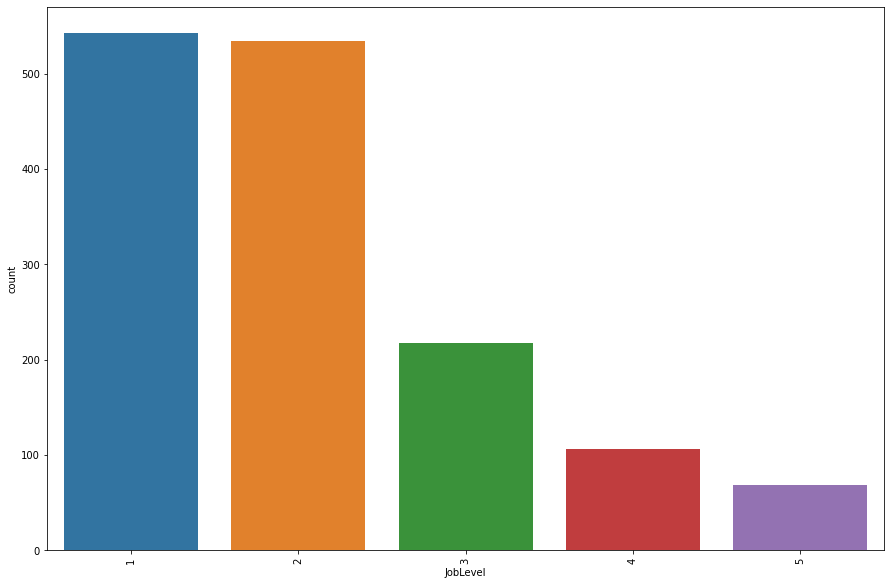

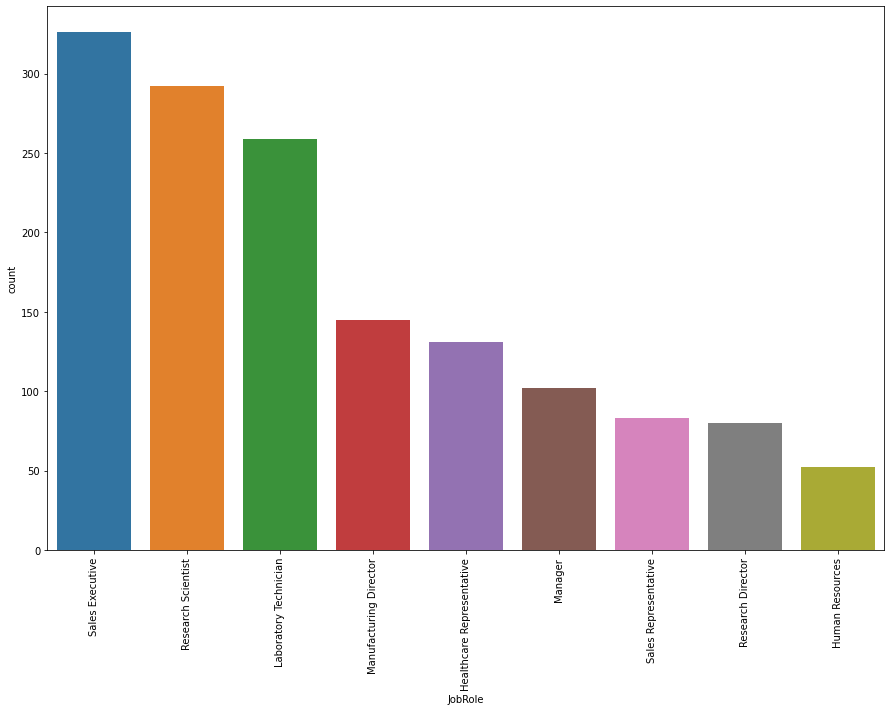

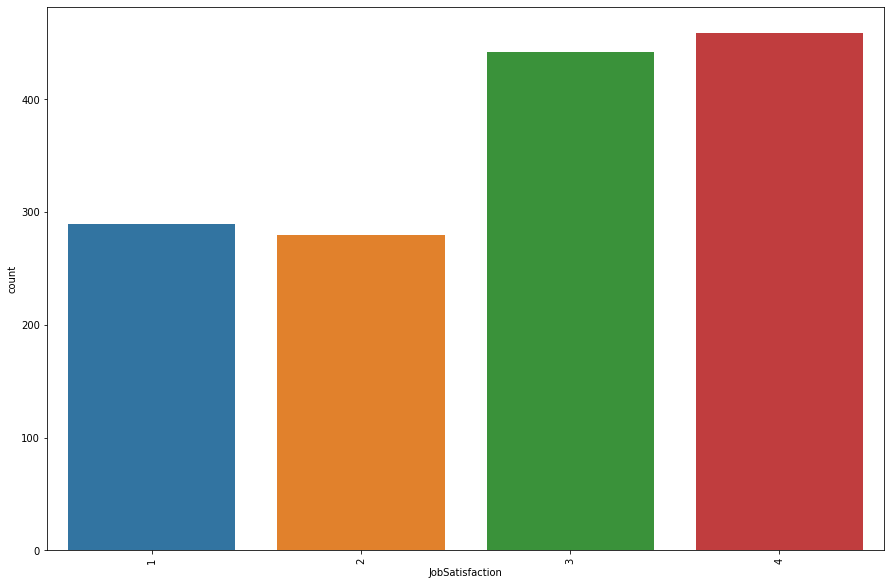

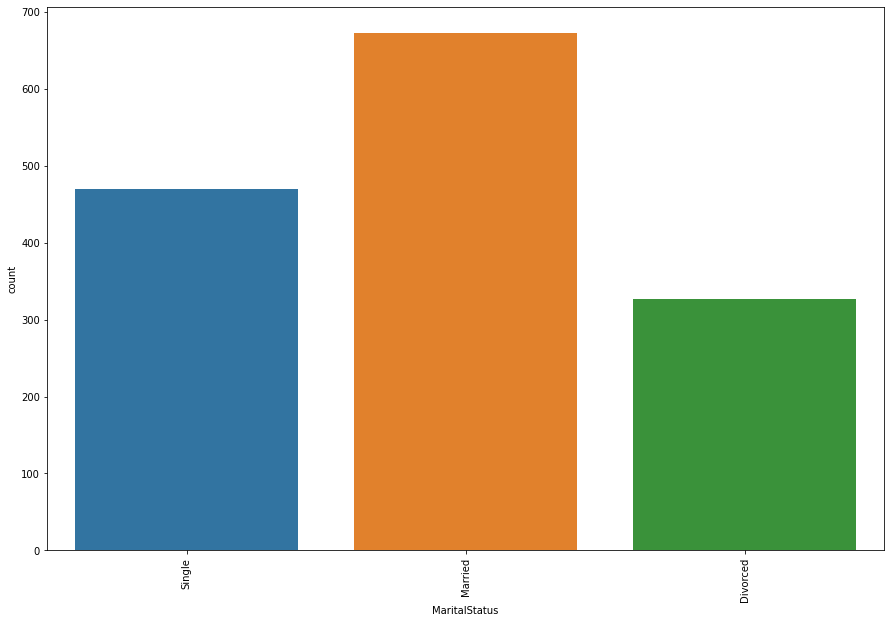

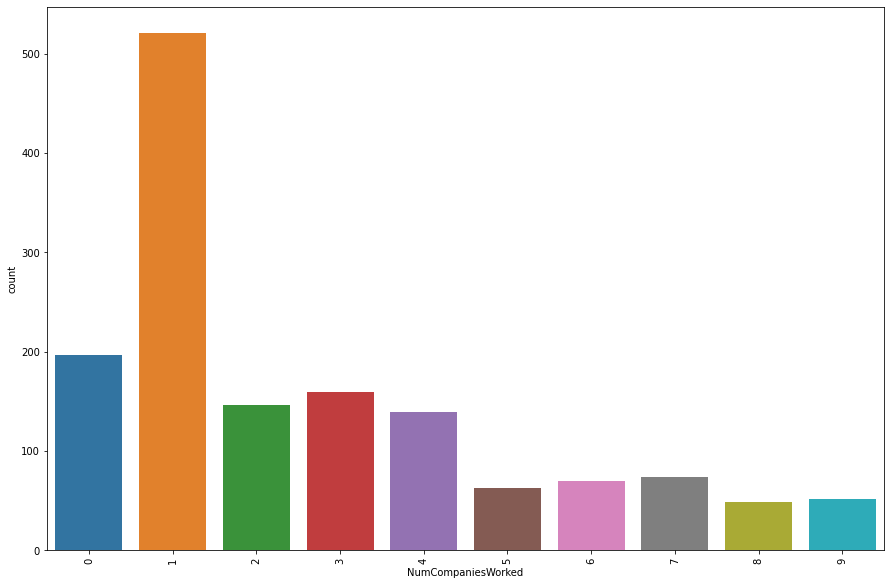

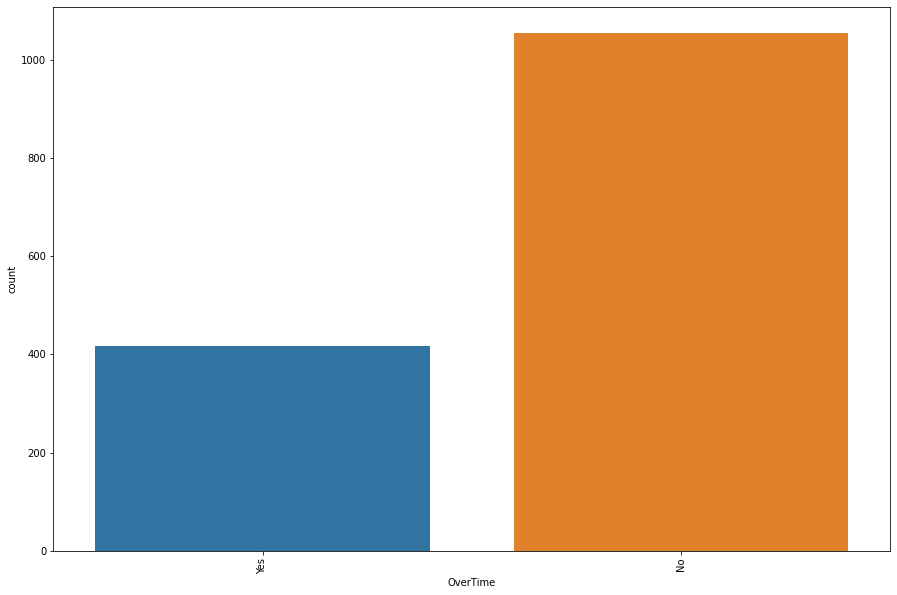

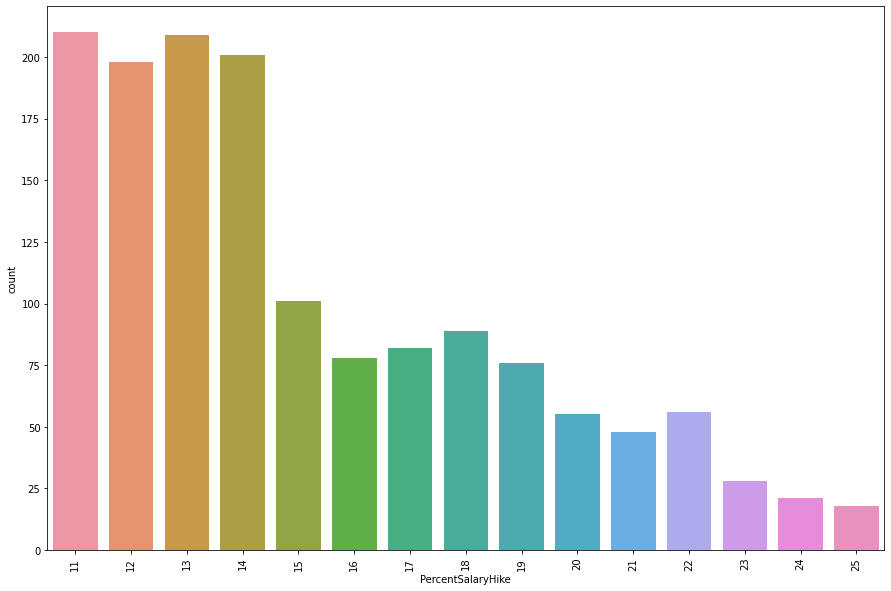

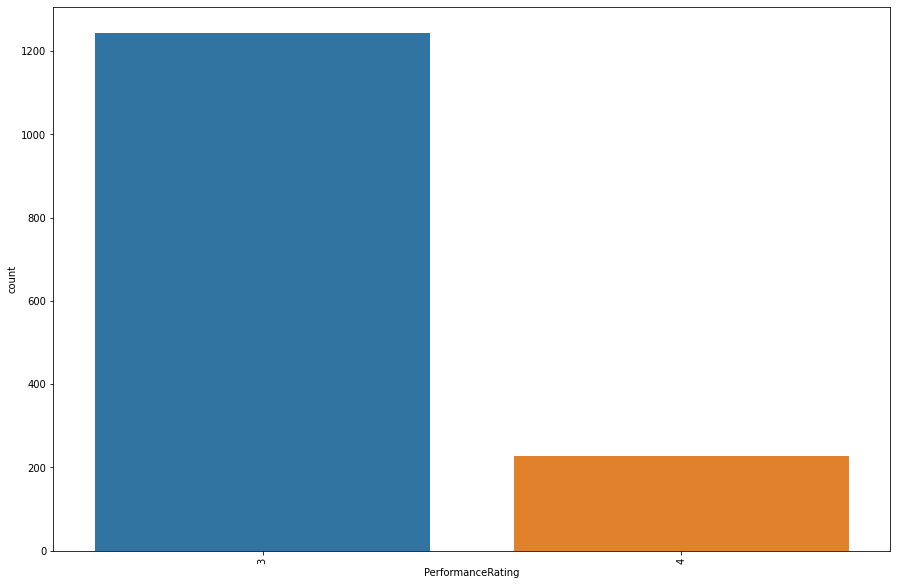

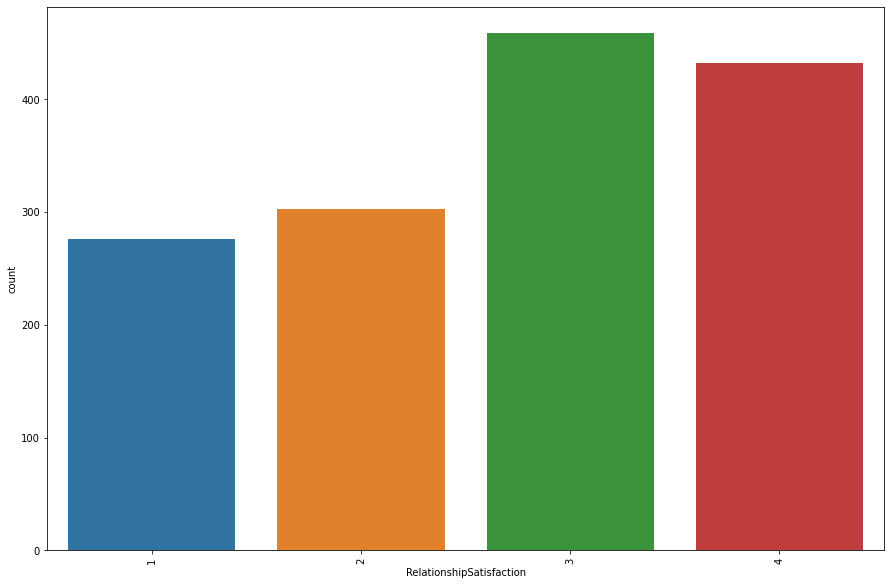

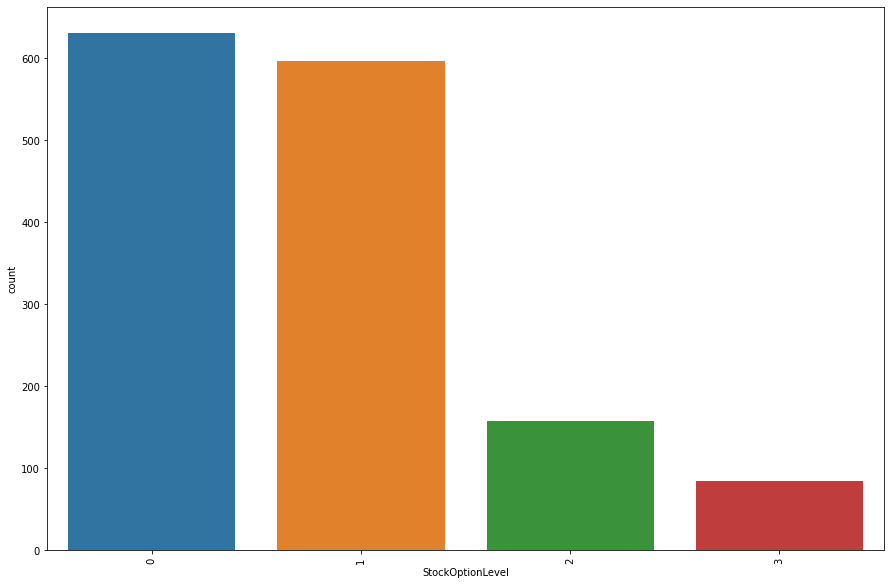

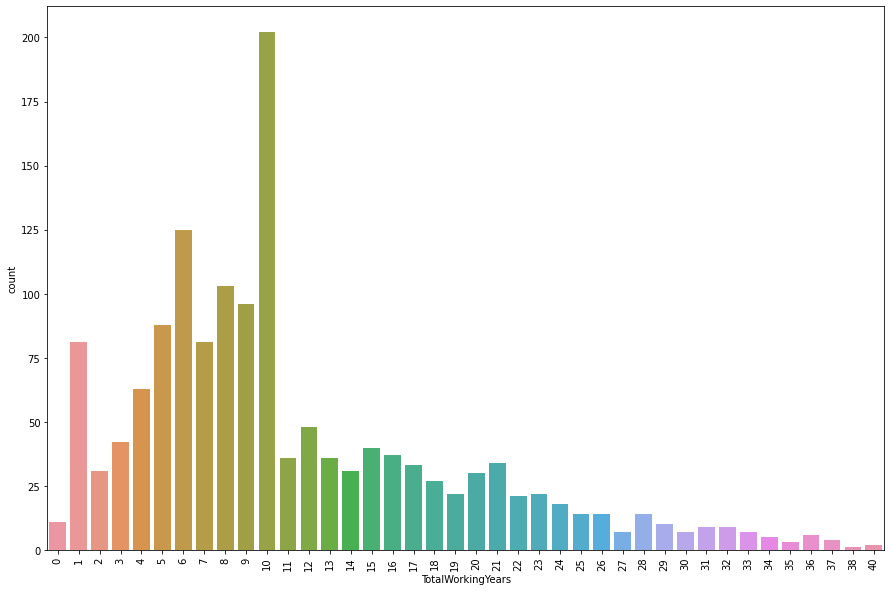

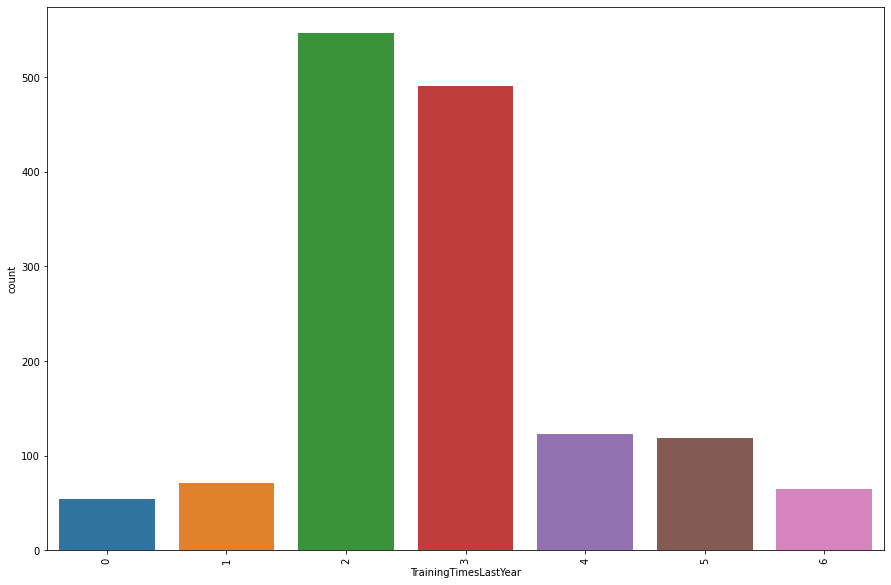

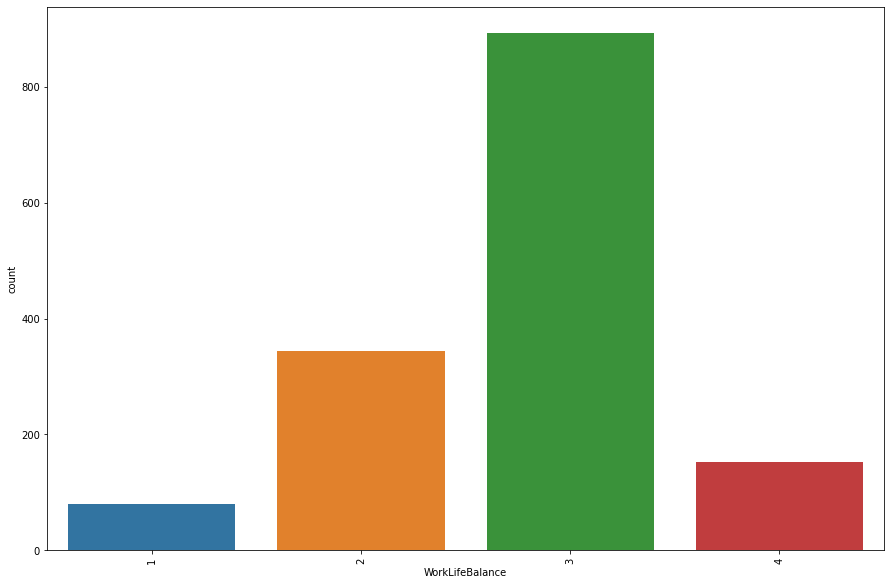

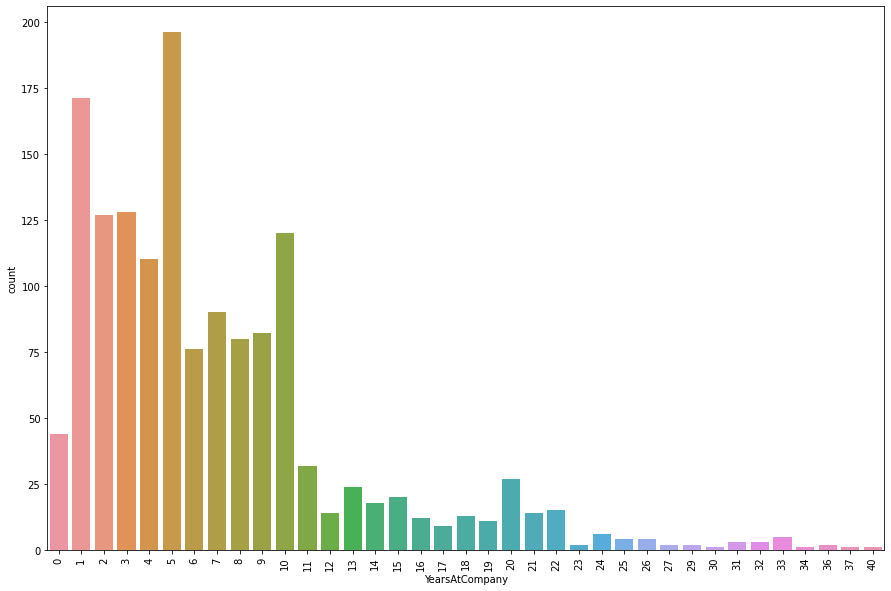

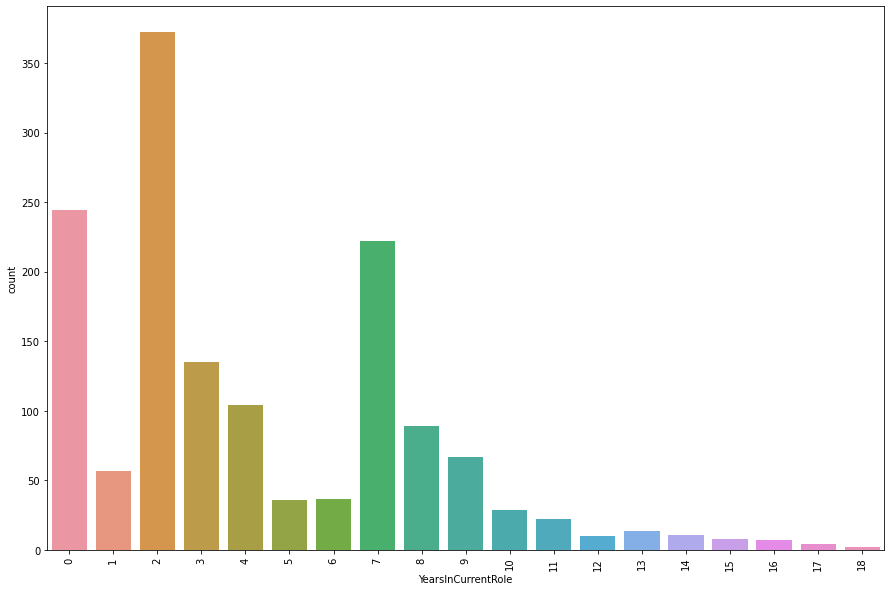

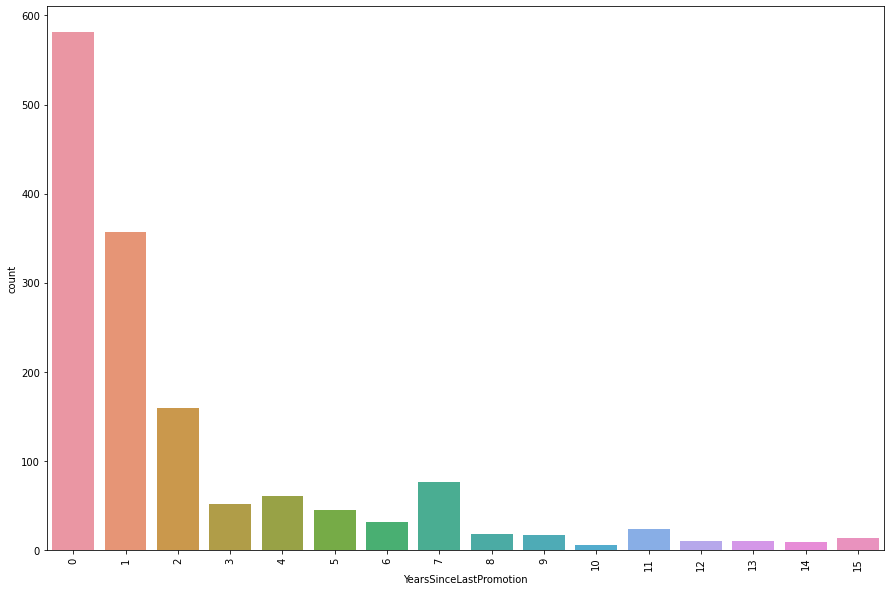

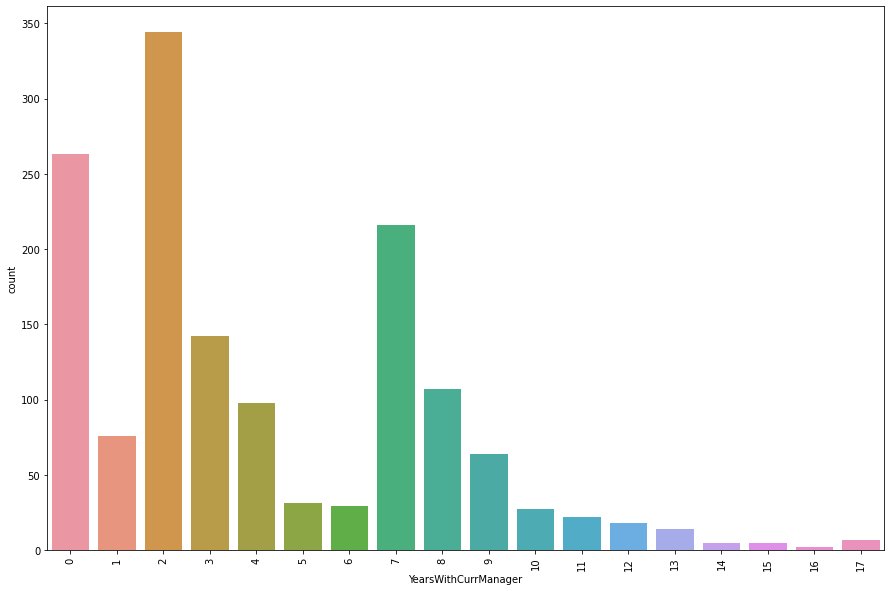

In [19]:
columns = ['Age','Attrition','BusinessTravel','Department','DistanceFromHome','Education','EducationField','EnvironmentSatisfaction','Gender','JobInvolvement','JobLevel','JobRole','JobSatisfaction','MaritalStatus','NumCompaniesWorked','OverTime','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
for col in columns:
    try:
        plt.figure(figsize=(15,10))
        sns.countplot(data[col])
        plt.xticks(rotation=90)
        plt.show()
    except:
        continue

Observations:
1. As in the kde, we can see that in Age the highest frequencies are from 27 to 40.
2. The Attrition variable has Yes and No as the categories. The data is pretty imbalanced. This is an imbalanced class classification problem.
3. The BusinessTravel variable is also imbalanced. The frequencies of Travel_Frequently and Non-Travel are very low. These categories cannot be merged because of their opposite meanings.
4. In the Department variable, the frequency of Human Resources category is very low. Research & Development has the highest number of datapoints.
5. From DistanceFromHome, most of the employees are staying within 1 or 2 kms/miles distance from the office.
6. In the Education variable, the category 3 occures the most followed by 4.
7. Most of the Employees have studied Life sciences and Medical.
8. In EnvironmentSatisfaction, the categories 1 and 2 may be merged. Similarly categories 3 and 4 may be merged if they make sense to be merged from further analysis.
9. There are more Male employees than Female employees in this dataset.
10. Most of the employees have rated JobInvolvement as 3 and the least is 1.
11. The number of employees in senior JobLevel is decreasing.
12. Most of the employees in this dataset are in the JobRoles as Sales Executives or Research Scientists or Laboratory Technicians.
13. from the JobSatisfaction plot, good percentage of employees are not Satisfied with their jobs.
14. Most employees are married. There are also a considerable number of divorcees.
15. From NumCompaniesWorked, The number of employees that worked in 1 company before this company is the highest.
16. There are about 400 employees that do Over time.
17. PercentSalaryHike: Most employees have received a Salary hike from 11% to 14%. Bigger percentages are given to lesser employees.
18. The PerformanceRating has only 2 categories in it. 3 and 4. Most of the employees have received the rating 3.
19. Most employees have given 3 or 4 for the RelationSatisfaction. however there are significant number of employees that have given 1 or 2.
20. StockOptionLevel: Most employees do not have any stock otion or get just 1.
21. TotalWorkingYears: There are a lot of employees with total experience of 10,6 and 8 years. Employees with high experience are very less.
22. Most employees have spent atleast 2 to 3 times for training Last year.
23. Most employees have rated their Work Life balance as 3.
24. Employees staying with the company for 5 years are the highest in count followed by 1 and 3.
25. YearsInCurrentRole: There are some employees who are staying in their current role for more than 8 years.
26. A good number of promotions have been given in 1 year. However, there are some employees who have not had a promotion for more than 5 years.
27. 2 years with the current Manager has the highest number of employees followed by 1 and 7 years.

Numeric variable based Population distribution with respect to employees that left the company and employees that did not leave.

#### Attrition with respect to the features

In [20]:
def get_attrition(data, col, func):
    if func == 'count':
        tot_emps_perage = pd.pivot_table(data, index=col, values='Attrition',aggfunc=func)
        df_attr = pd.pivot_table(data[data['Attrition'] == 'Yes'], index=col, values='Attrition',aggfunc=func)
        df_attr['%ContributionToTotalAttrition'] = df_attr['Attrition'].apply(lambda x: round(x/df_attr.sum()[0]*100))
        df_attr['Attrition%'] = df_attr['Attrition']*100//tot_emps_perage['Attrition']
    elif func == 'mean':
        df_attr = pd.pivot_table(data, index='Attrition', values=col,aggfunc=func)
        df_attr[col+"_mean"] = round(df_attr[col],2)
        df_attr.drop([col], axis=1,inplace=True)
        df_attr['std'] = round(pd.pivot_table(data, index='Attrition', values=col,aggfunc='std'),2)
        df_attr['min'] = round(pd.pivot_table(data, index='Attrition', values=col,aggfunc='min'),2)
        df_attr['max'] = round(pd.pivot_table(data, index='Attrition', values=col,aggfunc='max'),2)
    
    return df_attr

In [21]:
def show_attrition(data, col, func):
    if func == 'count':
        plt.figure(figsize=(15,7))
        plt.title(f"Frequency of {col}")
        sns.countplot(data[col], hue = data['Attrition'])
        plt.show()
    elif func == 'dist':
        plt.figure(figsize=(10,5))        
        plt.title(f"Distribution on {col}")
        sns.distplot(data[data['Attrition']=='Yes'][col], hist=False)
        plt.axvline(np.mean(data[data['Attrition']=='Yes'][col]), color='b', linestyle='--')
        sns.distplot(data[data['Attrition']=='No'][col], hist=False)
        plt.axvline(np.mean(data[data['Attrition']=='No'][col]), color='r', linestyle='--')
        plt.legend(['mean of Left company', 'mean of Not Left company'])
        plt.show()

        

#### Attrition with respect to Age

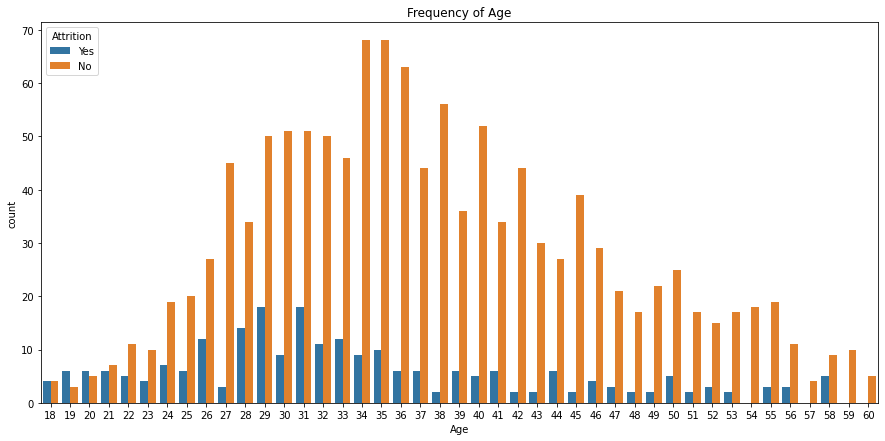

In [22]:
show_attrition(data, 'Age', 'count')

In [23]:
age_attr = get_attrition(data,'Age','count')

In [24]:
print(age_attr.sort_values(by='Attrition', ascending = False).head())
print(age_attr.sort_values(by='Attrition%', ascending = False).head())

     Attrition  %ContributionToTotalAttrition  Attrition%
Age                                                      
31          18                              8        26.0
29          18                              8        26.0
28          14                              6        29.0
33          12                              5        20.0
26          12                              5        30.0
     Attrition  %ContributionToTotalAttrition  Attrition%
Age                                                      
19           6                              3        66.0
20           6                              3        54.0
18           4                              2        50.0
21           6                              3        46.0
58           5                              2        35.0


Observations:
1. Although employees of age 31, 29 and 28 seem to have more number of attrition, the percentage of attrition for these age group is only 26% to 28%.
2. The actualy attrition percentage is pretty high in the age group 19,20 and 18.
3. We can also notice that, in the Attrition population, all the age groups are almost evenly distributed. Meaning No age group is heavily contributing to Attrition.

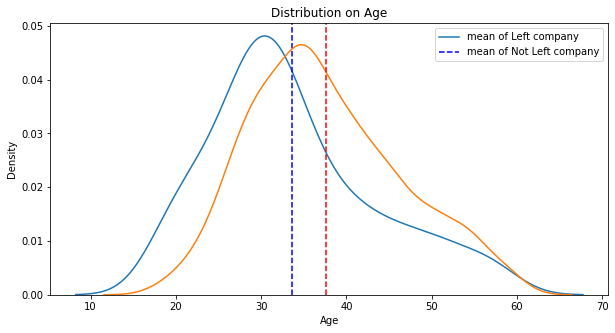

In [25]:
show_attrition(data,'Age','dist')

In [26]:
get_attrition(data,'Age','mean')

,Age_mean,std,min,max
Attrition,,,,
No,37.56,8.89,18,60
Yes,33.61,9.69,18,58


Observations:
1. From the above we can seethat the average age of active employees is 37.56 and the averageage of employees that left the company is 33.61. 
2. More younger employees are leaving the company.

#### Attrition with respect to Business Travels

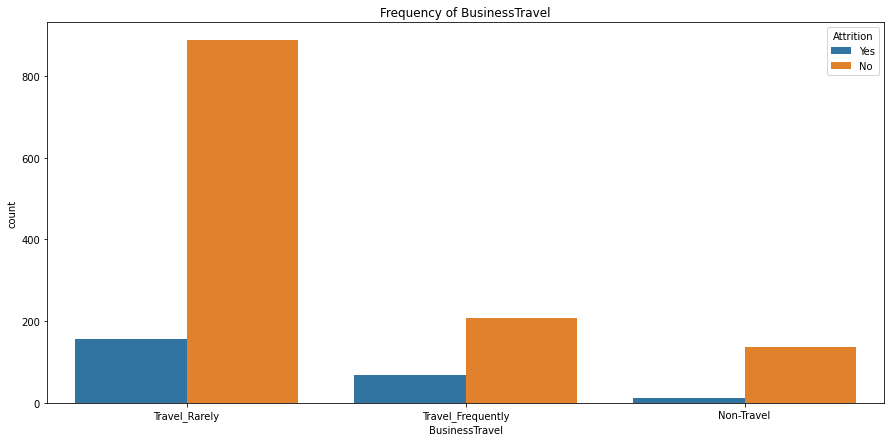

In [27]:
show_attrition(data, 'BusinessTravel', 'count')

In [28]:
get_attrition(data, 'BusinessTravel', 'count')

,Attrition,%ContributionToTotalAttrition,Attrition%
BusinessTravel,,,
Non-Travel,12,5,8
Travel_Frequently,69,29,24
Travel_Rarely,156,66,14


Observations:
1. The Attrition percentage is highest in the employees population that travels frequently.
2. The employees population that rarely travel is contributing about 66% to the total attrition population. This couls simply be because of the fact that the employees who travel Rarely are more in the entire population.
3. Employees that do not travel seem to have very low attrition rate.

#### Attrition with restpect to DailyRate

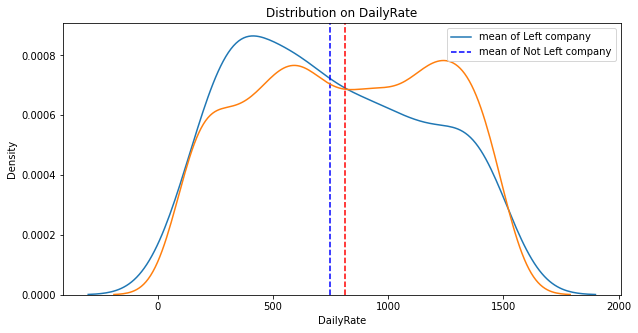

In [29]:
show_attrition(data, 'DailyRate','dist')

In [30]:
get_attrition(data, 'DailyRate', 'mean')

,DailyRate_mean,std,min,max
Attrition,,,,
No,812.50,403.21,102,1499
Yes,750.36,401.90,103,1496


Observations:
1. The population sample distribution is not very different with respect to Attritiong.
2. Even though we can see that the population that left the company have received lower DailyRate, there is not much difference.

#### Attrition with respect to Department

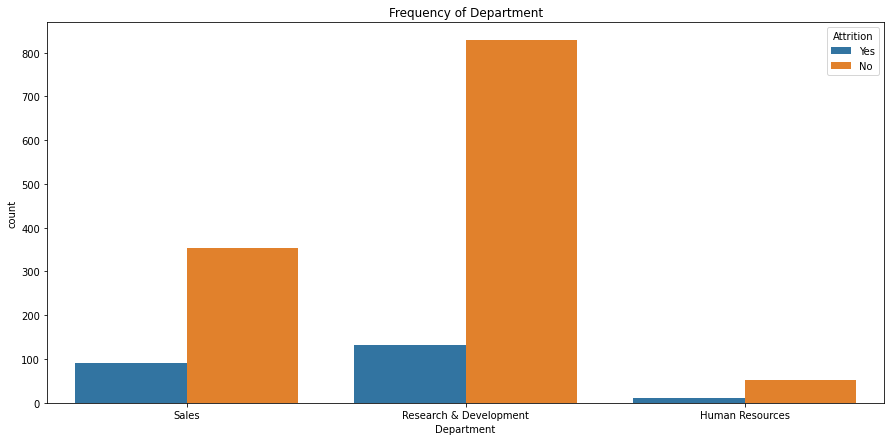

In [31]:
show_attrition(data,'Department','count')

In [32]:
get_attrition(data,'Department','count')

,Attrition,%ContributionToTotalAttrition,Attrition%
Department,,,
Human Resources,12,5,19
Research & Development,133,56,13
Sales,92,39,20


Observations:
1. The attrition percentage in the Sales department is the highest followed by Human Resources. Te difference is only 1%.
2. Even though the number of employees that left the company is high in Research & Development, the attrition percentage is the lowest in that Department when compared to other departments. This is because of the higher number of employees in Research & Development department.

#### Attrition with respect to DistanceFromHome

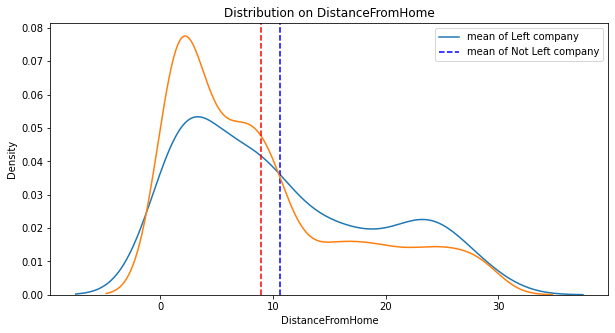

In [33]:
show_attrition(data, 'DistanceFromHome','dist')

In [34]:
get_attrition(data, 'DistanceFromHome','mean')

,DistanceFromHome_mean,std,min,max
Attrition,,,,
No,8.92,8.01,1,29
Yes,10.63,8.45,1,29


Observations:
1. The distance from home of Employees that left the company is on an average 10.63 kms/miles from the office. This indicates that the distance of the office from home could be one of the reasons for employees leaving the company.

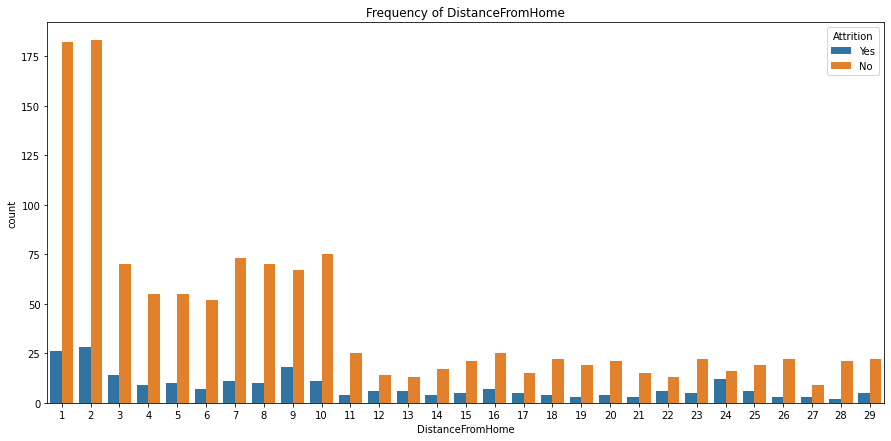

In [35]:
show_attrition(data, 'DistanceFromHome','count')

In [36]:
attr_dist = get_attrition(data,'DistanceFromHome','count')
print(attr_dist.sort_values(by='Attrition', ascending=False).head())
print(attr_dist.sort_values(by='Attrition%', ascending=False).head())

                  Attrition  %ContributionToTotalAttrition  Attrition%
DistanceFromHome                                                      
2                        28                             12          13
1                        26                             11          12
9                        18                              8          21
3                        14                              6          16
24                       12                              5          42
                  Attrition  %ContributionToTotalAttrition  Attrition%
DistanceFromHome                                                      
24                       12                              5          42
13                        6                              3          31
22                        6                              3          31
12                        6                              3          30
27                        3                              1          25


Observations:
1. The above values show that the greater distance from home is contributing to the attrition rate. 

In [37]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

#### Attrition with respect to Education

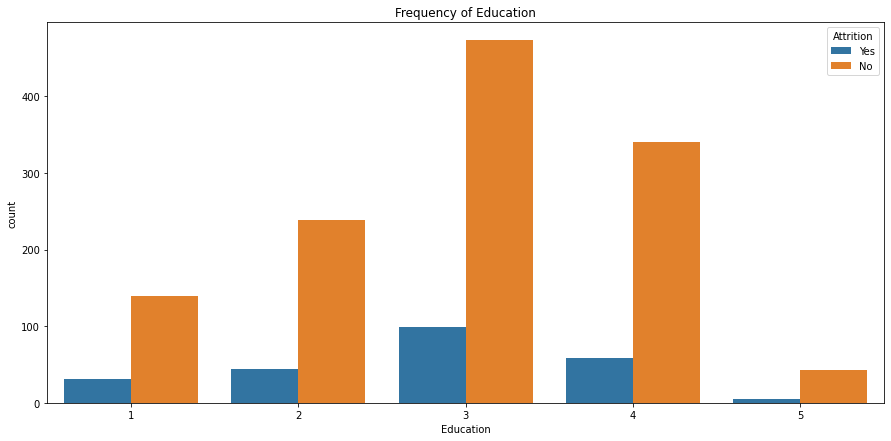

In [38]:
show_attrition(data,'Education','count')

In [39]:
get_attrition(data,'Education','count').sort_values(by='Attrition%', ascending=False)

,Attrition,%ContributionToTotalAttrition,Attrition%
Education,,,
1,31,13,18
3,99,42,17
2,44,19,15
4,58,24,14
5,5,2,10


Observations:
1. The Attrition % for employees with Education '1' is the highest closely followed by Education '3' and '2'
2. About 42% of the Employees that left the company had Education category value '3'.

In [40]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

#### Attrition with respect to Education Field of the employee

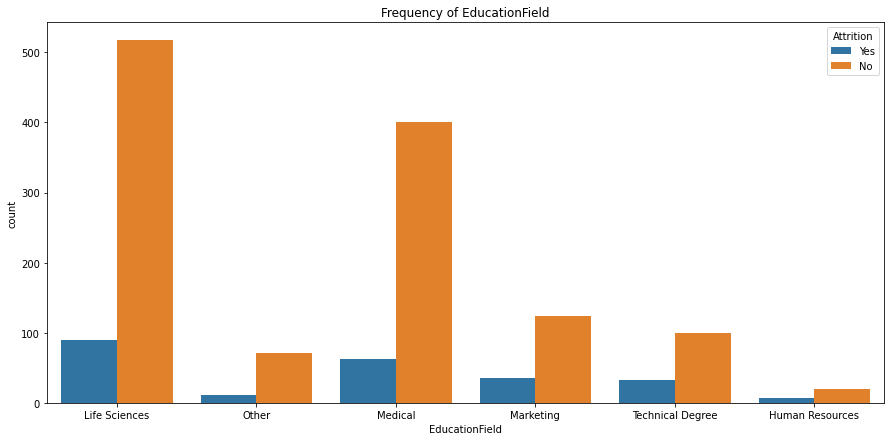

In [41]:
show_attrition(data,'EducationField','count')

In [42]:
get_attrition(data,'EducationField','count').sort_values(by='Attrition%',ascending=False)

,Attrition,%ContributionToTotalAttrition,Attrition%
EducationField,,,
Human Resources,7,3,25
Technical Degree,32,14,24
Marketing,35,15,22
Life Sciences,89,38,14
Medical,63,27,13
Other,11,5,13


Observations:
1. About 25% of the employees who completed their education in the field of HumanResource have left the company.
2. About 38% of the employees that left the company have completed their education in the Life Sciences Field.

In [43]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

#### Attrition with respect to EnvironmentSatisfaction

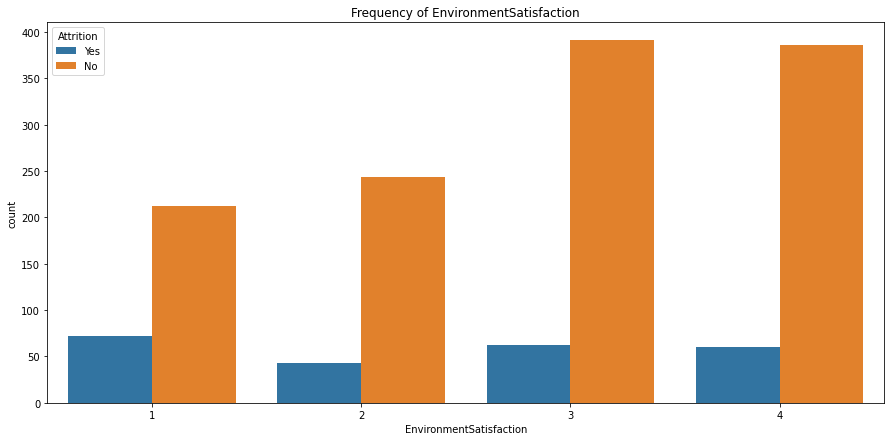

In [44]:
show_attrition(data,'EnvironmentSatisfaction','count')

In [45]:
get_attrition(data,'EnvironmentSatisfaction','count').sort_values(by='Attrition%',ascending =False)

,Attrition,%ContributionToTotalAttrition,Attrition%
EnvironmentSatisfaction,,,
1,72,30,25
2,43,18,14
3,62,26,13
4,60,25,13


Observations:
1. About 25% of the employees that are not satisfied with the environment have left the company. Also they are contributing about 30% of the total attrition.

In [46]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

#### Attrition with respect to Gender

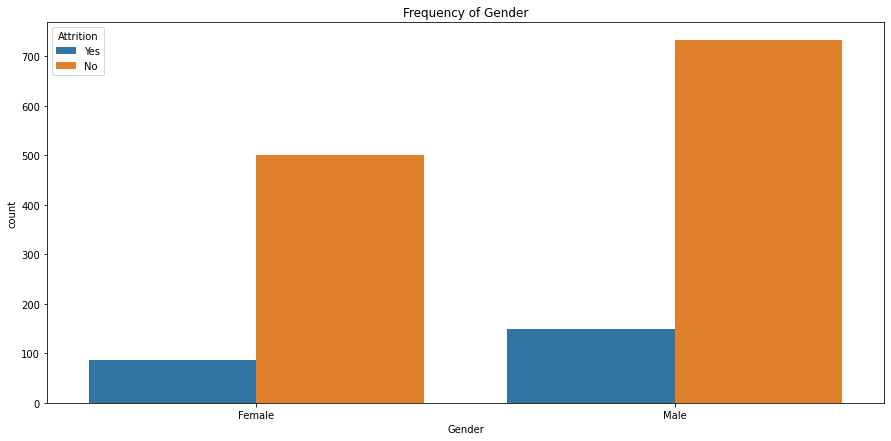

In [47]:
show_attrition(data,'Gender','count')

In [48]:
get_attrition(data,'Gender','count')

,Attrition,%ContributionToTotalAttrition,Attrition%
Gender,,,
Female,87,37,14
Male,150,63,17


Observations:
1. The male employees are contributing about 63% towards attrition. Also about 17% of the male employees have left the company.

### Attrition with respect to HourlyRate

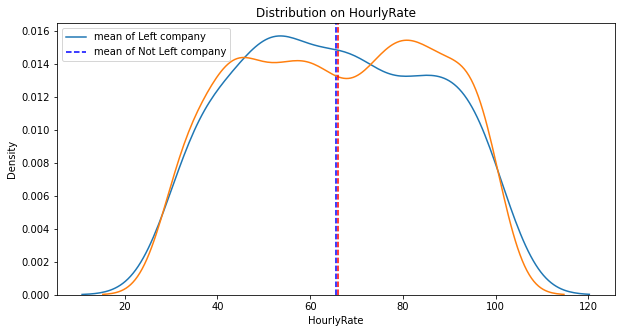

In [49]:
show_attrition(data,'HourlyRate','dist')

In [50]:
get_attrition(data,'HourlyRate','mean')

,HourlyRate_mean,std,min,max
Attrition,,,,
No,65.95,20.38,30,100
Yes,65.57,20.10,31,100


Observation:
1. It looks like the attrition is not much dependent on the HourlyRate.

In [51]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

#### Attrition with respect to Job Involvement

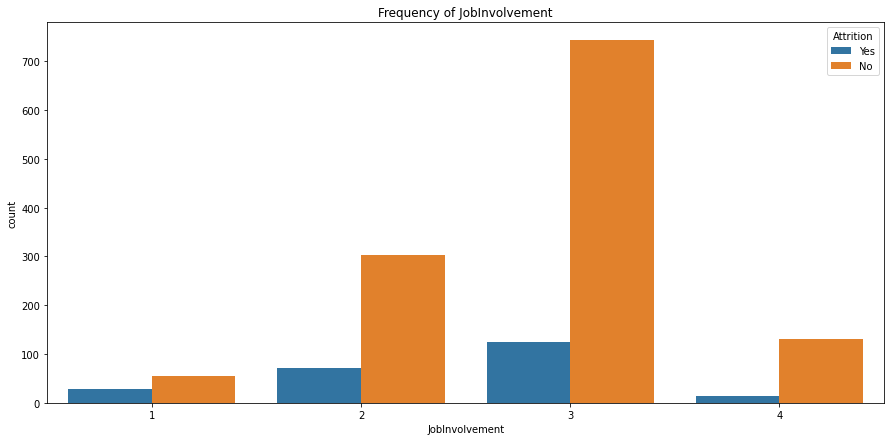

In [52]:
show_attrition(data,'JobInvolvement','count')

In [53]:
get_attrition(data,'JobInvolvement','count')

,Attrition,%ContributionToTotalAttrition,Attrition%
JobInvolvement,,,
1,28,12,33
2,71,30,18
3,125,53,14
4,13,5,9


Observations:
1. About 33% of the employees that rated Job Involvement as 1 have left the company.
2. About 53% of the total attrition is from the employees population that rated Job Involvement as 3. This is because for the large number of employees in this group.

In [54]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

#### Attrition with respect to JobLevel

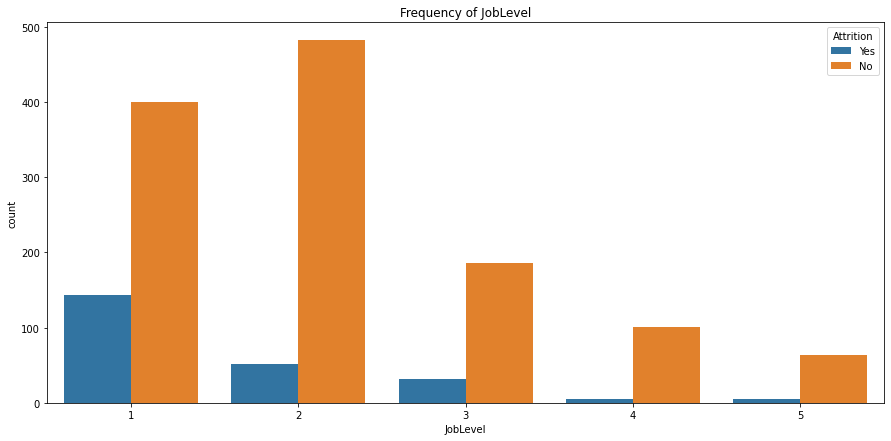

In [55]:
show_attrition(data,'JobLevel','count')

In [56]:
get_attrition(data,'JobLevel','count')

,Attrition,%ContributionToTotalAttrition,Attrition%
JobLevel,,,
1,143,60,26
2,52,22,9
3,32,14,14
4,5,2,4
5,5,2,7


Observations:
1. Employees in JobLevel category '1' are contributing about 60% of the total attrition.
2. Also, about 26% of the employees in Joblevel '1' have left the company.

In [57]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

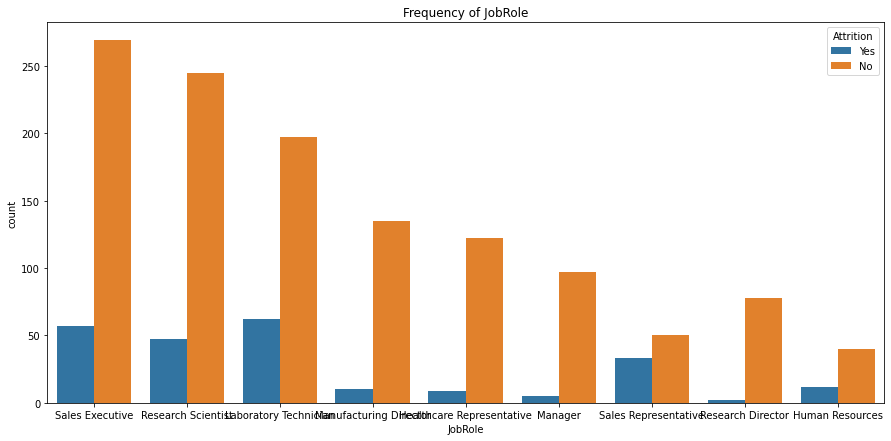

In [58]:
show_attrition(data,'JobRole','count')

In [59]:
get_attrition(data,'JobRole','count')

,Attrition,%ContributionToTotalAttrition,Attrition%
JobRole,,,
Healthcare Representative,9,4,6
Human Resources,12,5,23
Laboratory Technician,62,26,23
Manager,5,2,4
Manufacturing Director,10,4,6
Research Director,2,1,2
Research Scientist,47,20,16
Sales Executive,57,24,17
Sales Representative,33,14,39


Observations:
1. About 39% of the Sales representatives have left the company.
2. Lab Technicians have contributed about 26% to the total attrition population.

#### Attrition with respect to Job Satisfaction

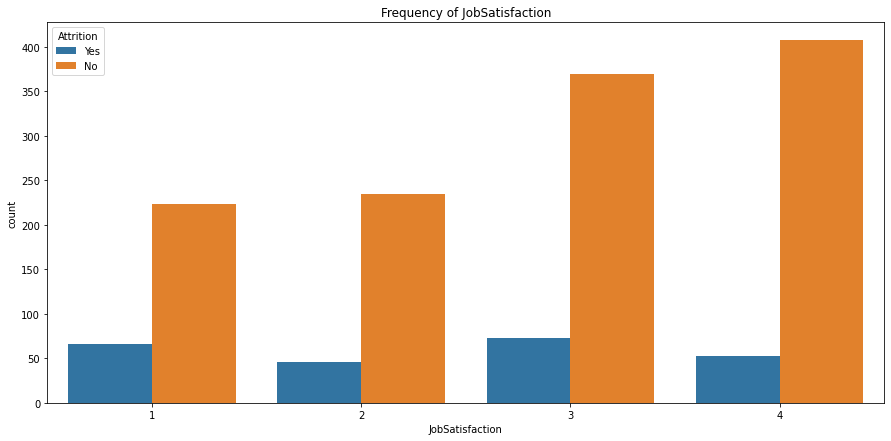

In [60]:
show_attrition(data,'JobSatisfaction','count')

In [61]:
get_attrition(data,'JobSatisfaction','count')

,Attrition,%ContributionToTotalAttrition,Attrition%
JobSatisfaction,,,
1,66,28,22
2,46,19,16
3,73,31,16
4,52,22,11


Observations:
1. It is observed that about 22% of the employees that rated the Job Satisfaction low have left the company which is 28% of the total attrition.

#### Attrition with respect to Marital Status 

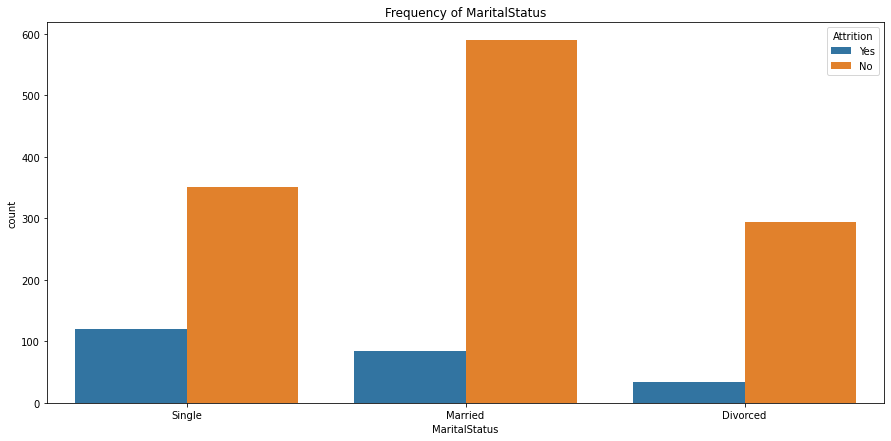

In [62]:
show_attrition(data,'MaritalStatus','count')

In [63]:
get_attrition(data,'MaritalStatus','count')

,Attrition,%ContributionToTotalAttrition,Attrition%
MaritalStatus,,,
Divorced,33,14,10
Married,84,35,12
Single,120,51,25


Obserations:
1. Employees that are single contributing about 51% of the total attrition.And about 25% of the single employees have left the company.

#### Attrition with respect to Monthly Income

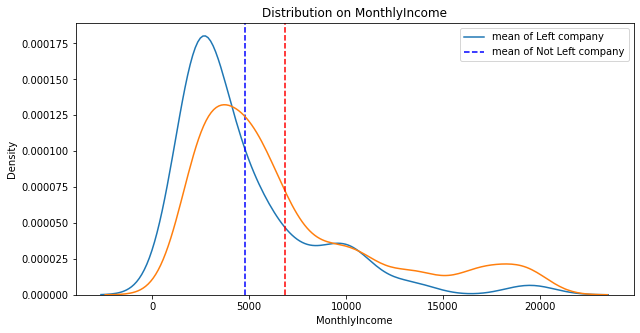

In [64]:
show_attrition(data,'MonthlyIncome','dist')

In [65]:
get_attrition(data,'MonthlyIncome','mean')

,MonthlyIncome_mean,std,min,max
Attrition,,,,
No,6832.74,4818.21,1051,19999
Yes,4787.09,3640.21,1009,19859


Observations:
1. The mean Monthly Income of the employees that left the company is lower than the mean Monthly income of employees that are staying.
2. Apparently Monthly Income is playing a significant role in attrition.

#### Attrition with respect to Monthly Rate

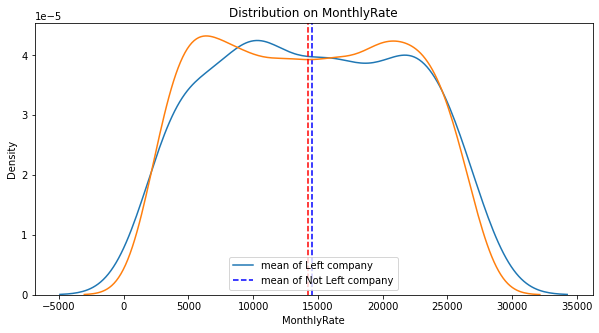

In [66]:
show_attrition(data,'MonthlyRate','dist')

In [67]:
get_attrition(data,'MonthlyRate','mean')

,MonthlyRate_mean,std,min,max
Attrition,,,,
No,14265.78,7102.26,2094,26997
Yes,14559.31,7208.15,2326,26999


Observations:
1. There is no significant impact shown for Monthly Rate on Attrition.

#### Attrition with respect to NumCompaniesWorked

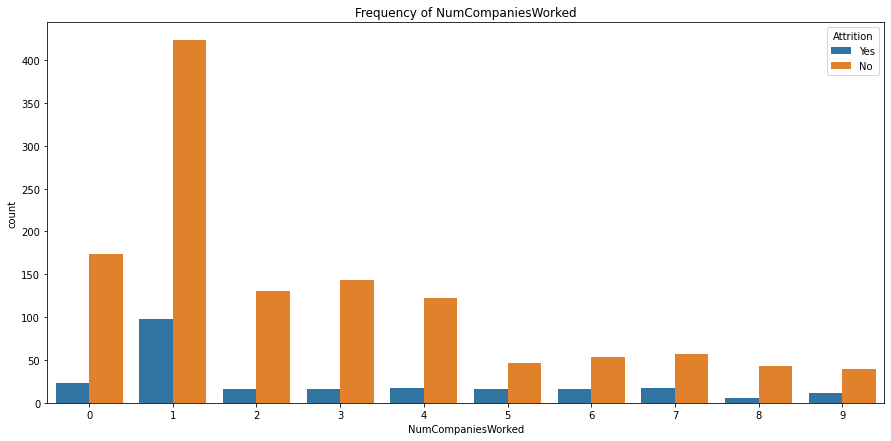

In [68]:
show_attrition(data,'NumCompaniesWorked','count')

In [69]:
get_attrition(data,'NumCompaniesWorked','count').sort_values(by='Attrition%', ascending=False)

,Attrition,%ContributionToTotalAttrition,Attrition%
NumCompaniesWorked,,,
5,16,7,25
9,12,5,23
6,16,7,22
7,17,7,22
1,98,41,18
4,17,7,12
8,6,3,12
0,23,10,11
2,16,7,10


Observations:
1. About 41% of the total employees who left the company have worked in 1 company prior to this company.
2. Among the employees whose 1st job is in this company, about 11% of the employees have left the company.
3. About 25% of employees that worked in 5 companies earlier have left the company. 
4. Most of the employees that left the company have worked in atleast 5 companies before joining this company.

#### Attrition with respect to OverTime

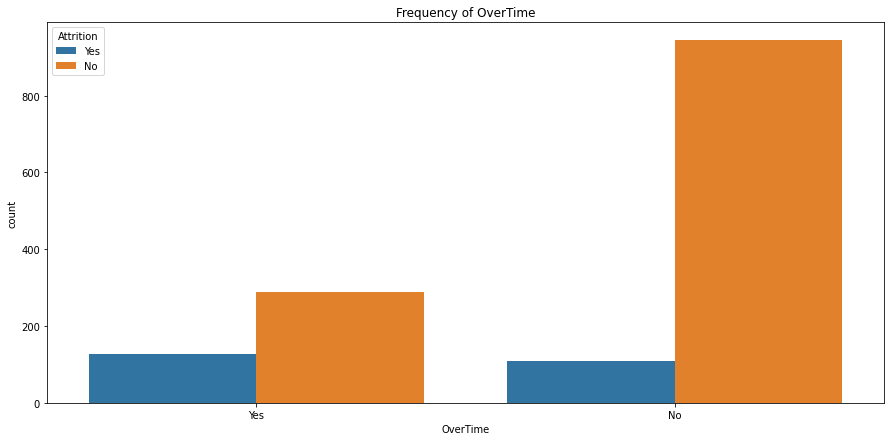

In [70]:
show_attrition(data,'OverTime','count')

In [71]:
 get_attrition(data,'OverTime','count')

,Attrition,%ContributionToTotalAttrition,Attrition%
OverTime,,,
No,110,46,10
Yes,127,54,30


Observations:
1. The Overtime is contribution about 54% to the total Attrition.
2. About 30% of the employees that worked overtime have left the company.

#### Attrition with respect to Percentage of Salary Hike

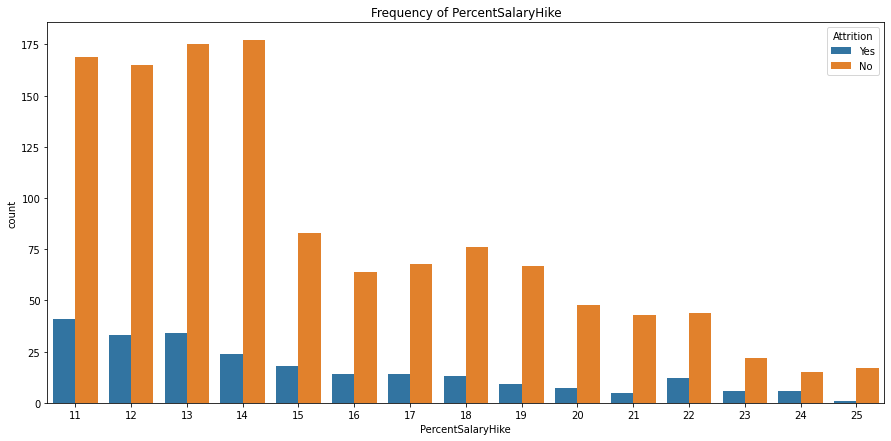

In [72]:
show_attrition(data,'PercentSalaryHike','count')

In [73]:
print(get_attrition(data,'PercentSalaryHike','count').sort_values(by='Attrition%', ascending=False).head())
print(get_attrition(data,'PercentSalaryHike','count').sort_values(by='Attrition', ascending=False).head())

                   Attrition  %ContributionToTotalAttrition  Attrition%
PercentSalaryHike                                                      
24                         6                              3          28
22                        12                              5          21
23                         6                              3          21
11                        41                             17          19
15                        18                              8          17
                   Attrition  %ContributionToTotalAttrition  Attrition%
PercentSalaryHike                                                      
11                        41                             17          19
13                        34                             14          16
12                        33                             14          16
14                        24                             10          11
15                        18                              8     

Observations:
1. It is interesting to notice that 28% of the employees that received a salary hike of 24% have left the company followed by 21% of employees who received 22% and 23% salary hike.
2. In the 2nd table it is observed that, employees that received the lowest salary hike are contributing to the total attrition.

#### Attrition with respect to Performance Rating

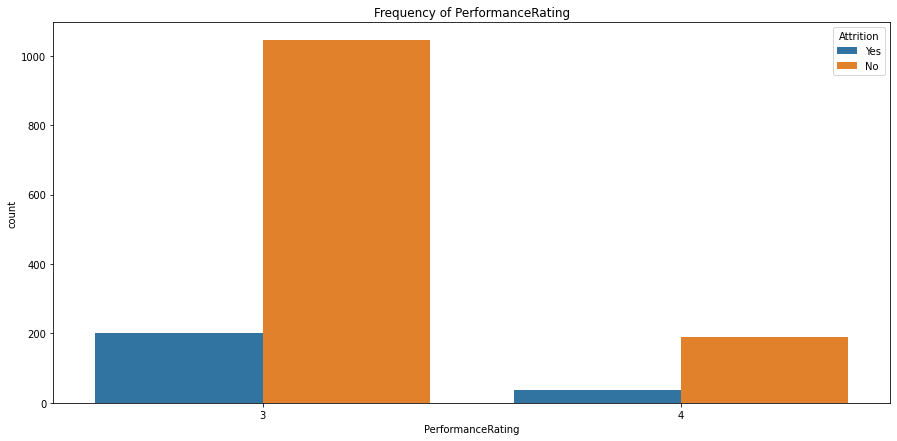

In [74]:
show_attrition(data,'PerformanceRating','count')

In [75]:
get_attrition(data,'PerformanceRating','count')

,Attrition,%ContributionToTotalAttrition,Attrition%
PerformanceRating,,,
3,200,84,16
4,37,16,16


Observations:
1. About 84% of the employees that left the company received a lower rating.
2. But the same percentage of employees have left the company from each category.

#### Attrition with respect to Relationship Satisfaction

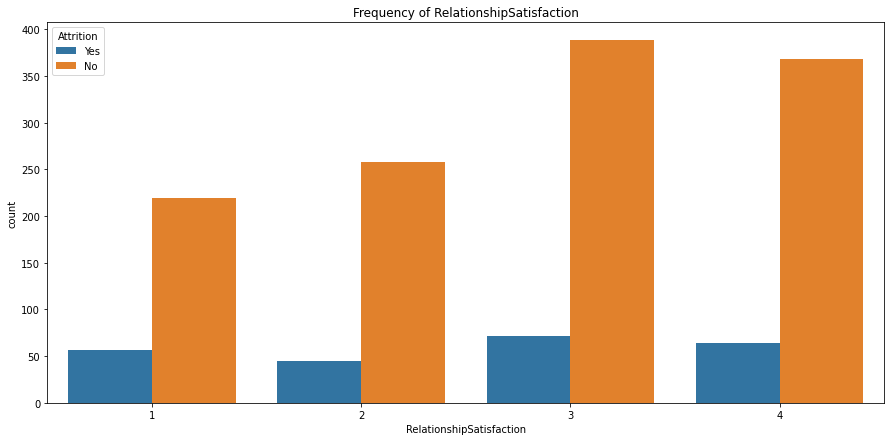

In [76]:
show_attrition(data,'RelationshipSatisfaction','count')

In [77]:
get_attrition(data,'RelationshipSatisfaction','count')

,Attrition,%ContributionToTotalAttrition,Attrition%
RelationshipSatisfaction,,,
1,57,24,20
2,45,19,14
3,71,30,15
4,64,27,14


Observations:
1. Relationship satisfaction is contributing to the attrition rate in the company.

#### Attrition with respect to StockOptionLevel

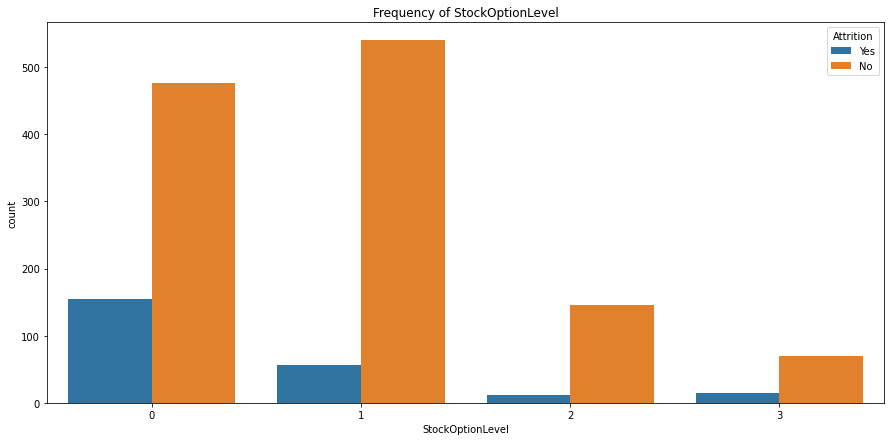

In [78]:
show_attrition(data,'StockOptionLevel','count')

In [79]:
get_attrition(data,'StockOptionLevel','count')

,Attrition,%ContributionToTotalAttrition,Attrition%
StockOptionLevel,,,
0,154,65,24
1,56,24,9
2,12,5,7
3,15,6,17


Observations:
1. StockOptionLevel 2 seem to be a good option to keep the employees in the company.

#### Attrition with respect to Total Working Years

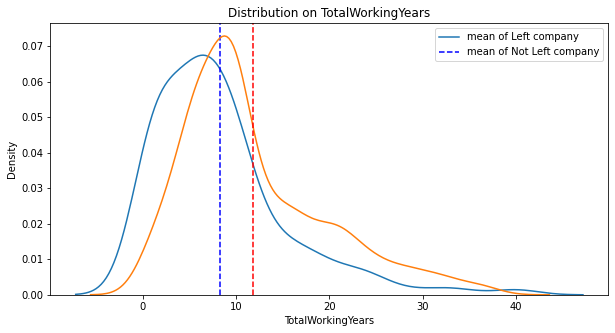

In [80]:
show_attrition(data,'TotalWorkingYears','dist')

In [81]:
get_attrition(data,'TotalWorkingYears','mean')

,TotalWorkingYears_mean,std,min,max
Attrition,,,,
No,11.86,7.76,0,38
Yes,8.24,7.17,0,40


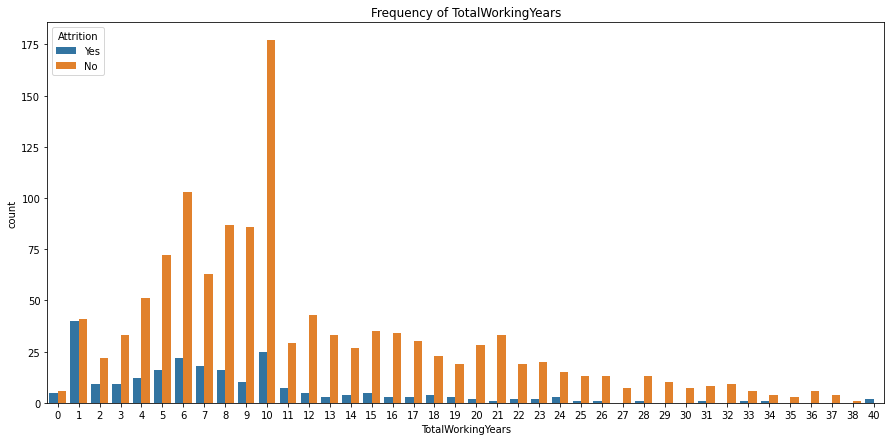

In [82]:
show_attrition(data,'TotalWorkingYears','count')

In [83]:
print(get_attrition(data,'TotalWorkingYears','count').sort_values(by='Attrition%',ascending=False).head())
print(get_attrition(data,'TotalWorkingYears','count').sort_values(by='Attrition',ascending=False).head())

                   Attrition  %ContributionToTotalAttrition  Attrition%
TotalWorkingYears                                                      
40                         2                              1       100.0
1                         40                             17        49.0
0                          5                              2        45.0
2                          9                              4        29.0
7                         18                              8        22.0
                   Attrition  %ContributionToTotalAttrition  Attrition%
TotalWorkingYears                                                      
1                         40                             17        49.0
10                        25                             11        12.0
6                         22                              9        17.0
7                         18                              8        22.0
5                         16                              7     

Observations:
1. Apparently there were only 2 employees that had 40years of Total experience and both of the have left the company.
2. About 45% and 49% of Employees with 0 and 1year of total experience respectively have left the company.
3. 17% of the employees that left the company have 1 year experience .

#### Attrition with respect to Training Times Last Year

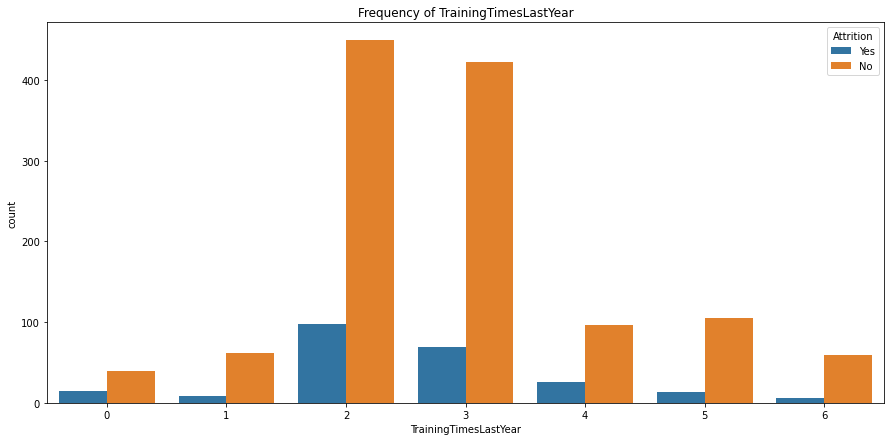

In [84]:
show_attrition(data,'TrainingTimesLastYear','count')

In [85]:
get_attrition(data,'TrainingTimesLastYear','count')

,Attrition,%ContributionToTotalAttrition,Attrition%
TrainingTimesLastYear,,,
0,15,6,27
1,9,4,12
2,98,41,17
3,69,29,14
4,26,11,21
5,14,6,11
6,6,3,9


Observations:
1. Employees that received training 2 or 3 times are contributing more in the total attrition.
2. About 27% of the employees that did not receive any training have left the company.

#### Attrition with respect to Work Life Balance

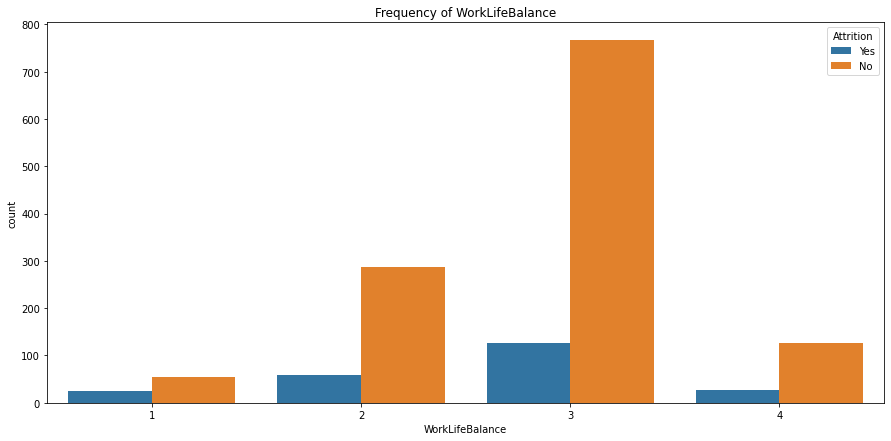

In [86]:
show_attrition(data,'WorkLifeBalance','count')

In [87]:
get_attrition(data,'WorkLifeBalance','count')

,Attrition,%ContributionToTotalAttrition,Attrition%
WorkLifeBalance,,,
1,25,11,31
2,58,24,16
3,127,54,14
4,27,11,17


Observations:
1. Clearly work life balance is playing a role in the attrition. 31% of employees that rated 1 for Work life balance have left the company.

#### Attrition with respect to Years at company

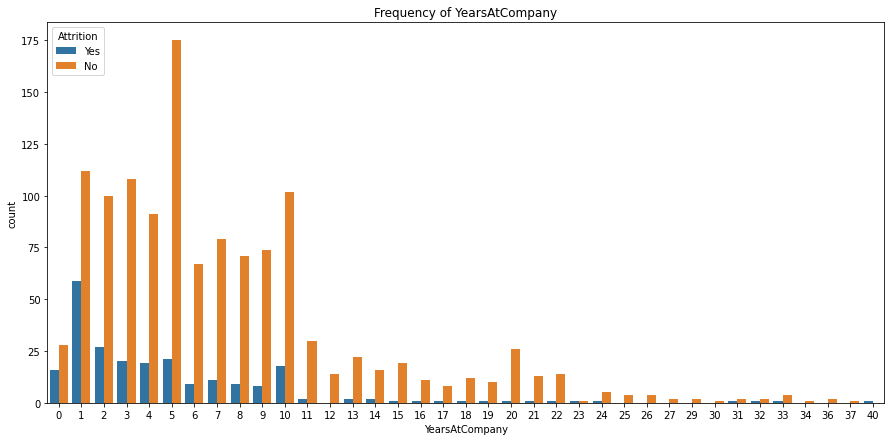

In [88]:
show_attrition(data,'YearsAtCompany','count')

In [89]:
print(get_attrition(data,'YearsAtCompany','count').sort_values(by='Attrition%', ascending=False).head())
print(get_attrition(data,'YearsAtCompany','count').sort_values(by='Attrition', ascending=False).head())

                Attrition  %ContributionToTotalAttrition  Attrition%
YearsAtCompany                                                      
40                      1                              0       100.0
23                      1                              0        50.0
0                      16                              7        36.0
1                      59                             25        34.0
31                      1                              0        33.0
                Attrition  %ContributionToTotalAttrition  Attrition%
YearsAtCompany                                                      
1                      59                             25        34.0
2                      27                             11        21.0
5                      21                              9        10.0
3                      20                              8        15.0
4                      19                              8        17.0


Observations:
1. Employees with less than 5 years of tenure in the company are contributing more to the attrition.
2. 2 employees with 23years,  1 employee with 40years and 3 employees with 31 years are there in the dataset. Hence these populations are showing higher attrition %.

#### Attrition with respect to Years in current Role

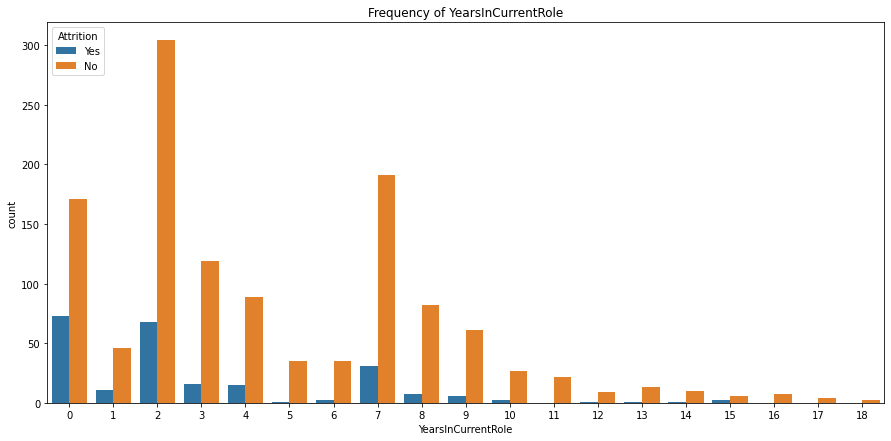

In [90]:
show_attrition(data,'YearsInCurrentRole','count')

In [91]:
print(get_attrition(data,'YearsInCurrentRole','count').sort_values(by='Attrition%', ascending=False).head())
print(get_attrition(data,'YearsInCurrentRole','count').sort_values(by='Attrition', ascending=False).head())

                    Attrition  %ContributionToTotalAttrition  Attrition%
YearsInCurrentRole                                                      
0                          73                             31        29.0
15                          2                              1        25.0
1                          11                              5        19.0
2                          68                             29        18.0
4                          15                              6        14.0
                    Attrition  %ContributionToTotalAttrition  Attrition%
YearsInCurrentRole                                                      
0                          73                             31        29.0
2                          68                             29        18.0
7                          31                             13        13.0
3                          16                              7        11.0
4                          15                      

Observations:
1. 29% of the Employees that got a promotion within one year have left the company and they are contributing about 31% of the total Attrition.

#### Attrition with respect to Years since last promotion

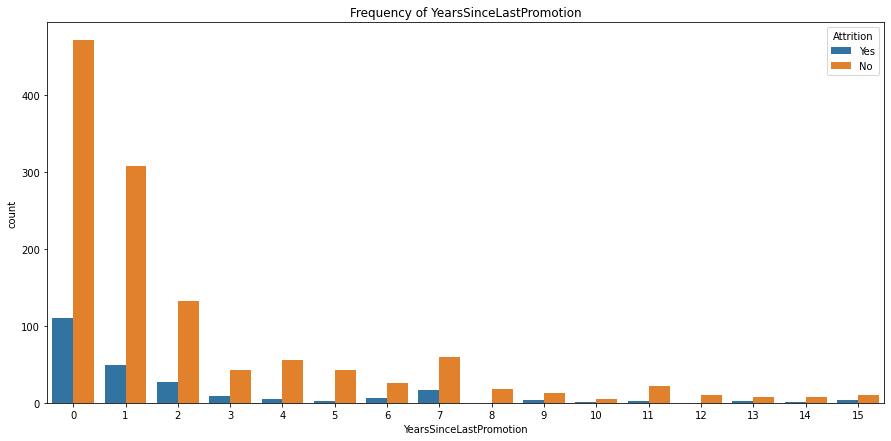

In [92]:
show_attrition(data,'YearsSinceLastPromotion','count')

In [93]:
print(get_attrition(data,'YearsSinceLastPromotion','count').sort_values(by='Attrition%', ascending=False).head())
print(get_attrition(data,'YearsSinceLastPromotion','count').sort_values(by='Attrition', ascending=False).head())

                         Attrition  %ContributionToTotalAttrition  Attrition%
YearsSinceLastPromotion                                                      
9                                4                              2        23.0
15                               3                              1        23.0
7                               16                              7        21.0
13                               2                              1        20.0
0                              110                             46        18.0
                         Attrition  %ContributionToTotalAttrition  Attrition%
YearsSinceLastPromotion                                                      
0                              110                             46        18.0
1                               49                             21        13.0
2                               27                             11        16.0
7                               16                              

Observations:
1. Employees with long years since the last promotion have the highest attrition % within the population.

#### Attrition with respect to Years with current manager

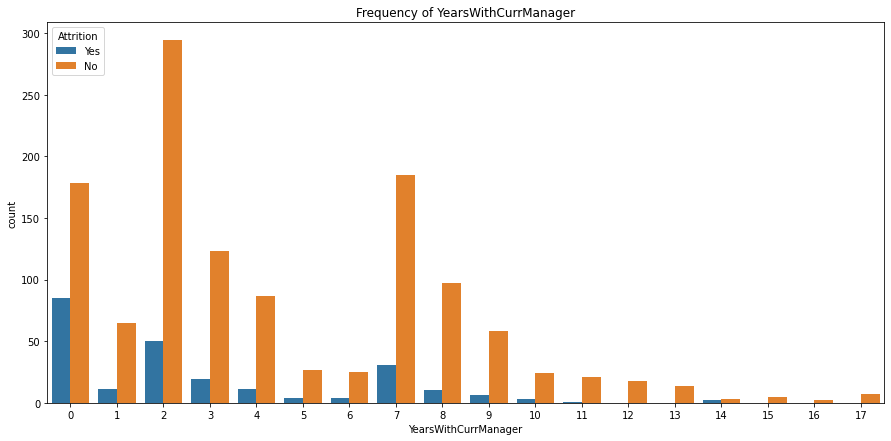

In [94]:
show_attrition(data,'YearsWithCurrManager','count')

In [95]:
print(get_attrition(data,'YearsWithCurrManager','count').sort_values(by='Attrition%', ascending=False).head())
print(get_attrition(data,'YearsWithCurrManager','count').sort_values(by='Attrition', ascending=False).head())

                      Attrition  %ContributionToTotalAttrition  Attrition%
YearsWithCurrManager                                                      
14                            2                              1        40.0
0                            85                             36        32.0
1                            11                              5        14.0
2                            50                             21        14.0
7                            31                             13        14.0
                      Attrition  %ContributionToTotalAttrition  Attrition%
YearsWithCurrManager                                                      
0                            85                             36        32.0
2                            50                             21        14.0
7                            31                             13        14.0
3                            19                              8        13.0
1                        

In [96]:
print(get_attrition(data,'YearsWithCurrManager','count').sort_values(by='Attrition%', ascending=False).head())
print(get_attrition(data,'YearsWithCurrManager','count').sort_values(by='Attrition', ascending=False).head())

                      Attrition  %ContributionToTotalAttrition  Attrition%
YearsWithCurrManager                                                      
14                            2                              1        40.0
0                            85                             36        32.0
1                            11                              5        14.0
2                            50                             21        14.0
7                            31                             13        14.0
                      Attrition  %ContributionToTotalAttrition  Attrition%
YearsWithCurrManager                                                      
0                            85                             36        32.0
2                            50                             21        14.0
7                            31                             13        14.0
3                            19                              8        13.0
1                        

Observations:
1. Notice that employees that had a manager change or assignment in less than a year arecontributing more in the attrition.


## Outliers

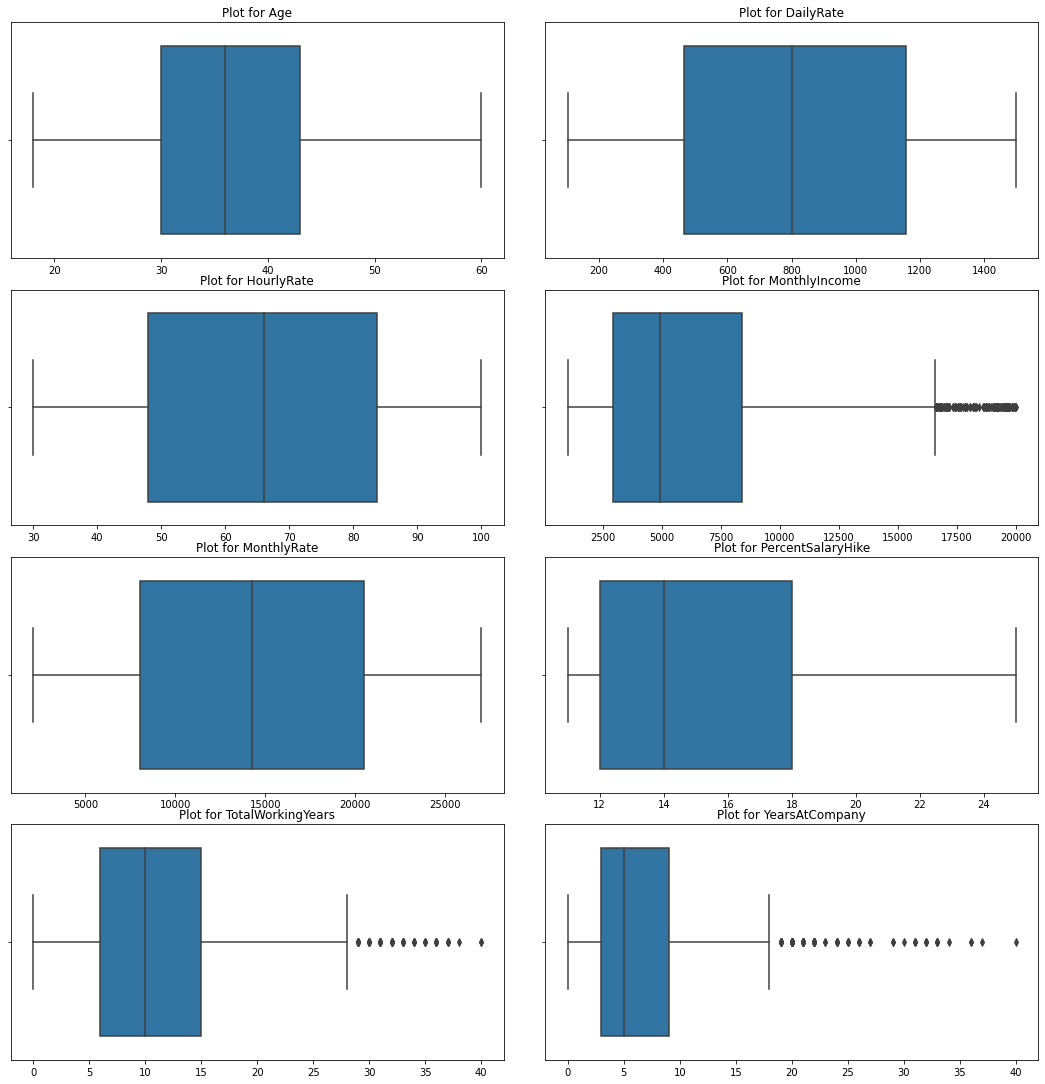

In [97]:
f,ax = plt.subplots(4,2,figsize=(15,15))
f.tight_layout()
columns=['Age','DailyRate','HourlyRate','MonthlyIncome','MonthlyRate','PercentSalaryHike','TotalWorkingYears','YearsAtCompany']
i,j = 0,0
for col in columns:
    
    graph = sns.boxplot(df[col], ax=ax[i,j])
    graph.set(xlabel=None)
    ax[i,j].set_title(f'Plot for {col}')
    
    j+=1
    if j%2==0:
        i+=1
        j=0

Observations:
1. The MonthlyIncome, TotalWorkingYears and YearsAtcompany show some outliers.
2. From the previous analysis, I can say that the outliers in MonthlyIncome, TotalWorkingYears and YearsAtcompany are some natural outliers. 
3. Only few employees are given high Monthly income. These employees could be top level executives and they would have big tenures in experience.

## Droping unwanted columns

1. I am dropping 'EmployeeCount','Over18','StandardHours' variables since they have only one value. 
2. Although Employee Number will not contribute in the model I am keeping it to identify each records. This variable will not be used in the model.

In [98]:
data.drop(['EmployeeCount','Over18','StandardHours'], axis=1, inplace=True)

## Encoding the Target variable

In [99]:
data['Attrition'] = data['Attrition'].apply(lambda x: 1 if x.lower() == 'yes' else 0)
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [100]:
data['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

## Correlations

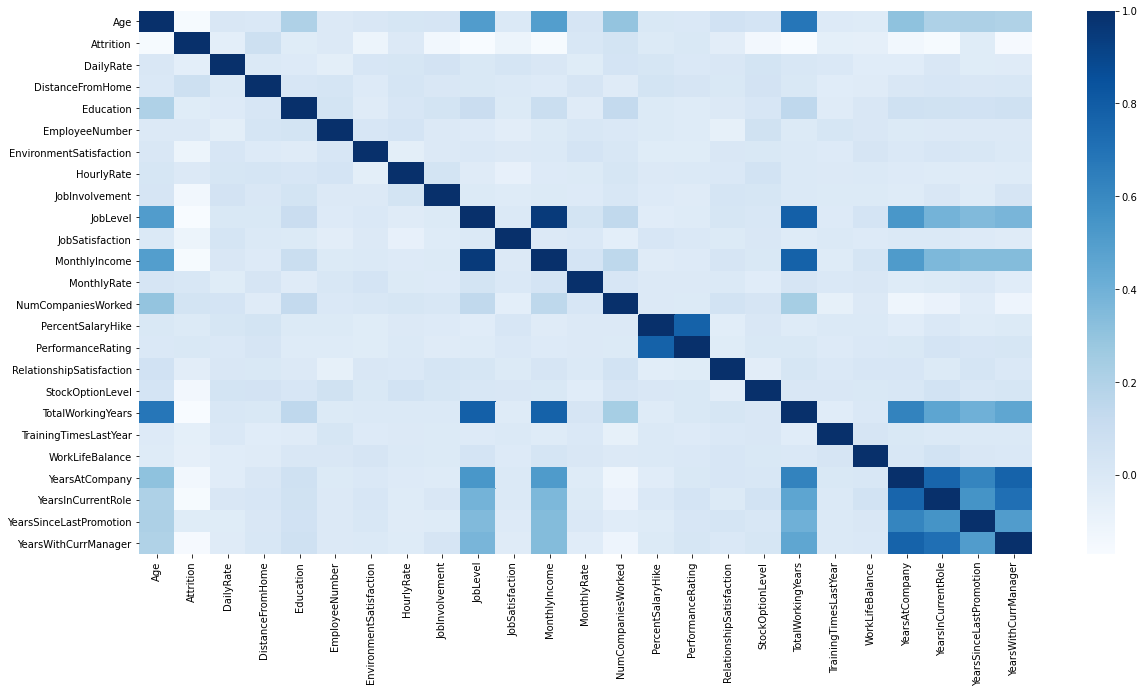

In [101]:
plt.figure(figsize=(20,10))
corr = data.corr()
sns.heatmap(corr, cmap = 'Blues')
plt.show()

Observations:
1. The correlation of the features to the target variable seem to be spread across all the variables.
2. There is some multicollinearity in the dataset among (Age, TotalWorkingYears),(Joblevel, MonthlyIncome),(PercentSalary & PerformanceRating) and (YearsAtCompany, YearsInCurrentRole,YearsSinceLastPromotion & YearsWithCurrManager).
3. Since the correlation is spread across all the variables, I need to investigate if removing multicollinearity will affect the models adversely.

In [102]:
data_no_multicol = data.drop(['PercentSalaryHike','YearsInCurrentRole','YearsWithCurrManager','JobLevel','YearsAtCompany','TotalWorkingYears'], axis=1)

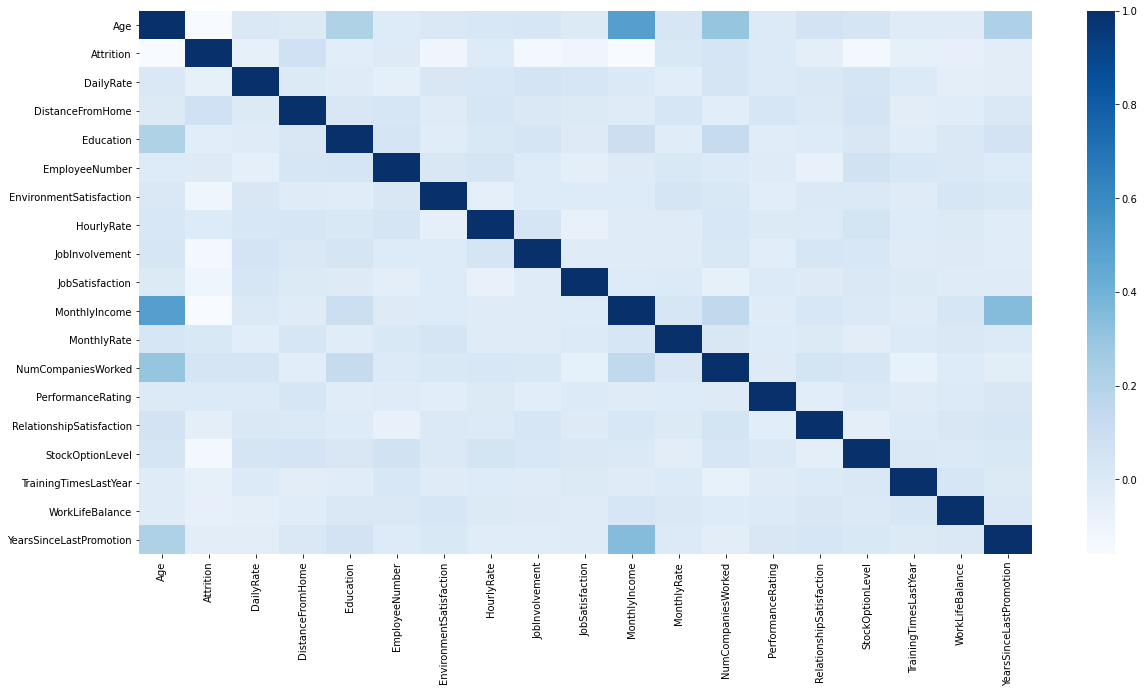

In [103]:
plt.figure(figsize=(20,10))
corr = data_no_multicol.corr()
sns.heatmap(corr, cmap = 'Blues')
plt.show()

## Data Encoding

In [104]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


Encoding the BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus,OverTime variables

In [105]:
data_enc = pd.get_dummies(data, drop_first=True)
data_no_multicol_enc = pd.get_dummies(data_no_multicol, drop_first = True)

In [106]:
data_enc.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,...,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,1,2,94,3,2,4,5993,19479,8,11,3,1,0,...,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,49,0,279,8,1,2,3,61,2,2,2,5130,24907,1,23,4,4,1,...,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,37,1,1373,2,2,4,4,92,2,1,3,2090,2396,6,15,3,2,0,...,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,33,0,1392,3,4,5,4,56,3,1,3,2909,23159,1,11,3,3,0,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,27,0,591,2,1,7,1,40,3,1,2,3468,16632,9,12,3,4,1,...,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0


In [107]:
data_no_multicol_enc.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,...,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,1,2,94,3,4,5993,19479,8,3,1,0,0,1,...,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,49,0,279,8,1,2,3,61,2,2,5130,24907,1,4,4,1,3,3,...,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,37,1,1373,2,2,4,4,92,2,3,2090,2396,6,3,2,0,3,3,...,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,33,0,1392,3,4,5,4,56,3,3,2909,23159,1,3,3,0,3,3,...,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,27,0,591,2,1,7,1,40,3,2,3468,16632,9,3,4,1,3,3,...,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0


#### Base model to check if Multicollinearity needs to be removed

In [111]:
#X and y with Multicollinearity
X_m = data_enc.drop(['Attrition'],axis=1)
y_m = data_enc['Attrition']

#X and y removed multicolinearity
x = data_no_multicol_enc.drop(['Attrition'],axis=1)
y = data_no_multicol_enc['Attrition']


In [112]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20,stratify=y, random_state=0)
x_train_m, x_test_m, y_train_m, y_test_m = train_test_split(X_m,y_m,test_size = 0.3, stratify = y_m, random_state=0)

In [113]:
lr = LogisticRegression(class_weight='balanced')

lr.fit(x_train_m, y_train_m)
y_trainpred = lr.predict(x_train_m)
y_pred = lr.predict(x_test_m)
print('Train score with Multicollinearity: ',roc_auc_score(y_train_m, y_trainpred))
print('Test score with Multicollinearity: ',roc_auc_score(y_test_m, y_pred))

lr.fit(x_train, y_train)
y_trainpred = lr.predict(x_train)
y_pred = lr.predict(x_test)
print('Train score with NO Multicollinearity: ',roc_auc_score(y_train, y_trainpred))
print('Test score with NO Multicollinearity: ',roc_auc_score(y_test, y_pred))


Train score with Multicollinearity:  0.6666643398623463
Test score with Multicollinearity:  0.6585839360487248
Train score with NO Multicollinearity:  0.6637290487882993
Test score with NO Multicollinearity:  0.6055646481178396


Observations:
1. Removing multicollinearity is not giving us great results. Infact it is slightly reducing the score. This must be because of the fact that the correlation of the features with the target is spread across and not concentrated of certain features.
2. Hence I am not going to remove the multicollinearity.

### Separating the Features and the target variable

In [114]:
#X and y with Multicollinearity
x = data_enc.drop(['Attrition','EmployeeNumber'],axis=1)
y = data_enc['Attrition']

## Data Transformation and Standardization

Notice the warning above while using Logistic regression model. Also the score is pretty low. This must be because the values in the dataset are in different ranges. Hence applying StandardScaler to scale the data.

PowerTransformer

In [156]:
pt = PowerTransformer()
x_pt = sc.fit_transform(x)

StandardScaler

In [118]:
sc = StandardScaler()
x_sc = sc.fit_transform(x)

RobustScaler

In [120]:
rs = RobustScaler()
x_rs = rs.fit_transform(x)

In [121]:
x_trainp, x_testp, y_trainp, y_testp = train_test_split(x_pt,y,test_size = 0.20,stratify=y, random_state=0)
x_trains, x_tests, y_trains, y_tests = train_test_split(x_sc,y,test_size = 0.20,stratify=y, random_state=0)
x_trainr, x_testr, y_trainr, y_testr = train_test_split(x_rs,y,test_size = 0.20,stratify=y, random_state=0)

In [122]:
lr = LogisticRegression(class_weight='balanced')

lr.fit(x_trainp, y_trainp)
y_trainpred = lr.predict(x_trainp)
y_pred = lr.predict(x_testp)
print('Train score with PowerTransformer: ',roc_auc_score(y_trainp, y_trainpred))
print('Test score with PowerTransformer: ',roc_auc_score(y_testp, y_pred))

lr.fit(x_trains, y_trains)
y_trainpred = lr.predict(x_trains)
y_pred = lr.predict(x_tests)
print('\nTrain score with StandardScaler: ',roc_auc_score(y_trains, y_trainpred))
print('Test score with StandardScaler: ',roc_auc_score(y_tests, y_pred))

lr.fit(x_trainr, y_trainr)
y_trainpred = lr.predict(x_trainr)
y_pred = lr.predict(x_testr)
print('\nTrain score with RobustScaler: ',roc_auc_score(y_trainr, y_trainpred))
print('Test score with RobustScaler: ',roc_auc_score(y_testr, y_pred))

Train score with PowerTransformer:  0.8009928472296359
Test score with PowerTransformer:  0.6911017314152813

Train score with StandardScaler:  0.8087915020817764
Test score with StandardScaler:  0.6885605995348436

Train score with RobustScaler:  0.8014999466211166
Test score with RobustScaler:  0.693126022913257


Observations:
1. Notice that RobustScaler is giving us a slightly better performance. Hence I will be using RobustScaler scaled data.

## Finding the Random State

In [123]:
best_train_score = 0
best_test_score = 0
best_r_state = 0

for i in range(0, 1000):
    x_train, x_test, y_train, y_test = train_test_split(x_rs, y ,test_size = 0.25, random_state=i, stratify=y)
    lr = LogisticRegression(class_weight='balanced')
    lr.fit(x_train, y_train)
    train_pred = lr.predict(x_train)
    test_pred = lr.predict(x_test)
    
    train_score = roc_auc_score(y_train, train_pred)
    test_score = roc_auc_score(y_test, test_pred)

    #Making sure that the variace is as low as possible
    if round(train_score*100,1) == round(test_score*100,1):
        if test_score > best_test_score:
            best_test_score = test_score
            best_train_score = train_score
            best_r_state = i
        
print(f'At the Random_State {best_r_state}, the model performs very well.')
print(f'Train score is {best_train_score*100}')
print(f'Test score is {best_test_score*100}')


At the Random_State 594, the model performs very well.
Train score is 78.69667785398123
Test score is 78.74225220777798


Observations:
1. At the randomstate 594, The variance has decreased significantly.


#### Splitting the train and test set using optimum Random_state

Adding in the Employee number to the data to identify each record

In [125]:
x_df_rs = pd.DataFrame(x_rs, columns = data_enc.drop(['Attrition','EmployeeNumber'],axis=1).columns.values)
x_df_rs['EmployeeNumber'] = data_enc['EmployeeNumber']
x_df_rs.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,...,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,EmployeeNumber
0,0.384615,0.433526,-0.500000,-0.5,-0.5,0.783217,0.0,0.0,0.5,0.196416,0.422369,2.000000,-0.500000,0.0,-1.0,-1.0,-0.222222,-3.0,...,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1
1,1.000000,-0.755780,0.083333,-1.0,0.0,-0.139860,-1.0,0.0,-0.5,0.038588,0.859600,-0.333333,1.500000,1.0,0.5,0.0,0.000000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2
2,0.076923,0.825145,-0.416667,-0.5,0.5,0.727273,-1.0,-0.5,0.0,-0.517374,-0.953683,1.333333,0.166667,0.0,-0.5,-1.0,-0.333333,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4
3,-0.230769,0.852601,-0.333333,0.5,0.5,-0.279720,0.0,-0.5,0.0,-0.367593,0.718797,-0.333333,-0.500000,0.0,0.0,-1.0,-0.222222,0.0,...,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,5
4,-0.692308,-0.304913,-0.416667,-1.0,-1.0,-0.727273,0.0,-0.5,-0.5,-0.265362,0.193040,2.333333,-0.333333,0.0,0.5,0.0,-0.444444,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7


In [126]:
x_train, x_test, y_train, y_test = train_test_split(x_df_rs, y ,test_size = 0.25, random_state=594, stratify=y)

## Model Selection

In [128]:
models = [LogisticRegression(class_weight='balanced'),DecisionTreeClassifier(class_weight='balanced'),KNeighborsClassifier(weights='distance'),GaussianNB(),SVC(class_weight='balanced')]

results = []
m_names = []
for model in models:
    name = model.__class__.__name__
    kfold = KFold(n_splits=10, random_state=594, shuffle=True)
    cv_result = cross_val_score(model, x_train.drop(['EmployeeNumber'], axis=1), y_train, cv= kfold, scoring = 'roc_auc')
    results.append(cv_result)
    m_names.append(name)
    print(f"{name}: Mean score: {round(cv_result.mean(),3)}  Variance: {round(cv_result.var(),3)}")
    

LogisticRegression: Mean score: 0.823  Variance: 0.002
DecisionTreeClassifier: Mean score: 0.598  Variance: 0.01
KNeighborsClassifier: Mean score: 0.671  Variance: 0.009
GaussianNB: Mean score: 0.744  Variance: 0.008
SVC: Mean score: 0.807  Variance: 0.003


Observations:
1. LogisticRegression and SVC are performing well for this dataset. These can be further tunned to see if the performance can be improved.

### Ensemble Technique

In [130]:
models = [AdaBoostClassifier(),GradientBoostingClassifier(),RandomForestClassifier(class_weight='balanced'),XGBClassifier(eval_metric='logloss')]
results = []
m_names = []

for model in models:
    name = model.__class__.__name__
    kfold = KFold(n_splits=10, random_state=594, shuffle=True)
    cv_result = cross_val_score(model, x_train.drop(['EmployeeNumber'], axis=1), y_train, cv= kfold, scoring = 'roc_auc')
    results.append(cv_result)
    m_names.append(name)
    print(f"{name}: Mean score: {round(cv_result.mean(),3)}  Variance: {round(cv_result.var(),3)}")

AdaBoostClassifier: Mean score: 0.806  Variance: 0.005
GradientBoostingClassifier: Mean score: 0.803  Variance: 0.005
RandomForestClassifier: Mean score: 0.798  Variance: 0.005
XGBClassifier: Mean score: 0.788  Variance: 0.005


Observations:
1. Adaboost and gradient boost models are performing well. These can be further tunned.

## HyperParameter Tunning

SVC Tunning

In [ ]:
params = {'C':[0.1,0.5,1.0],
          'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
          'gamma': ['scale', 'auto']}

model = SVC(class_weight = 'balanced')

kfold = KFold(n_splits=10, random_state=594, shuffle=True)
gridcv_svc = GridSearchCV(estimator=model, param_grid=params, scoring='roc_auc', cv=kfold, verbose = 10, n_jobs=-1)
grid_result_svc = gridcv_svc.fit(x_train.drop(['EmployeeNumber'], axis=1), y_train)


In [132]:
print(f"The Best score for SVC : {grid_result_svc.best_score_} with parameters: {grid_result_svc.best_params_}")
var = np.mean(grid_result_svc.cv_results_['std_test_score']**2)
print("Variance: ",var)

The Best score for SVC : 0.822504791187316 with parameters: {'C': 1.0, 'gamma': 'scale', 'kernel': 'linear'}
Variance:  0.006039249656879776


LogisticRegression Tunning

In [ ]:
params = {'fit_intercept':[True, False],
          'C':[0.1,0.5,1.0, 1.5],
          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

model = LogisticRegression(class_weight='balanced')

kfold = KFold(n_splits=10, random_state=594, shuffle=True)
gridcv_lr = GridSearchCV(estimator=model, param_grid=params, scoring='roc_auc', cv=kfold, verbose = 10, n_jobs=-1)
grid_result_lr = gridcv_lr.fit(x_train.drop(['EmployeeNumber'], axis=1), y_train)

In [134]:
print(f"The Best score for LogisticRegression : {grid_result_lr.best_score_} with parameters: {grid_result_lr.best_params_}")
print("variance: ",np.mean(grid_result_lr.cv_results_['std_test_score']**2))

The Best score for LogisticRegression : 0.8236714382871678 with parameters: {'C': 0.5, 'fit_intercept': True, 'solver': 'newton-cg'}
variance:  0.0026154274484699097


AdaBoostClassifier Tunning

In [ ]:
params = {'n_estimators':[int(x) for x in np.linspace(start = 2500, stop = 3500, num = 5)],
          'learning_rate':[0.001,0.01,0.5, 0.1, 1]}

model = AdaBoostClassifier()

kfold = KFold(n_splits=10, random_state=594, shuffle=True)
gridcv_ada = GridSearchCV(estimator=model, param_grid=params, scoring='roc_auc', cv=kfold, verbose = 10, n_jobs=-1)
grid_result_ada = gridcv_ada.fit(x_train.drop(['EmployeeNumber'], axis=1), y_train)

In [136]:

print(f"The Best score for Adaboost : {grid_result_ada.best_score_} with parameters: {grid_result_ada.best_params_}")
print("Variance: ",np.mean(grid_result_ada.cv_results_['std_test_score']**2))

The Best score for Adaboost : 0.8294236807797996 with parameters: {'learning_rate': 0.01, 'n_estimators': 2750}
Variance:  0.0021913066513107875


GradientBoostingClassifier Tunnning

In [ ]:
params = {'loss' : ['deviance', 'exponential'],
          'criterion':['friedman_mse', 'mse'],
          'max_depth': [int(x) for x in np.linspace(10,110,5)],
          'max_features' : ['auto','log2'],
          'n_estimators':[int(x) for x in np.linspace(start = 1500, stop = 3000, num = 5)],
          'learning_rate':[0.5, 0.1, 1]}

model = GradientBoostingClassifier()

kfold = KFold(n_splits=10, random_state=594, shuffle=True)
gridcv_gbc = GridSearchCV(estimator=model, param_grid=params, scoring='roc_auc', cv=kfold, verbose = 10, n_jobs=-1)
grid_result_gbc = gridcv_gbc.fit(x_train.drop(['EmployeeNumber'], axis=1), y_train)

In [138]:
print(f"The Best score for GradientBoost : {grid_result_gbc.best_score_} with parameters: {grid_result_gbc.best_params_}")
print("Variance: ",np.mean(grid_result_gbc.cv_results_['std_test_score']**2))

The Best score for GradientBoost : 0.8146999257707623 with parameters: {'criterion': 'friedman_mse', 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 60, 'max_features': 'log2', 'n_estimators': 3000}
Variance:  0.007519509434778797


Selecting the best Tunned Model

In [139]:
models = [LogisticRegression(class_weight='balanced',C = 0.5, fit_intercept = True, solver = 'newton-cg'),
          SVC(class_weight = 'balanced', C = 1.0, gamma = 'scale', kernel = 'linear'),
          AdaBoostClassifier( learning_rate = 0.01, n_estimators = 2750),
          GradientBoostingClassifier(criterion = 'friedman_mse', learning_rate = 0.1, loss = 'deviance', max_depth = 60, max_features = 'log2', n_estimators = 3000)]
results = []
m_names = []

for model in models:
    name = model.__class__.__name__
    kfold = KFold(n_splits=10, random_state=594, shuffle=True)
    cv_result = cross_val_score(model, x_train.drop(['EmployeeNumber'], axis=1), y_train, cv= kfold, scoring = 'roc_auc')
    results.append(cv_result)
    m_names.append(name)
    print(f"{name}: Mean score: {round(cv_result.mean(),3)}  Variance: {round(cv_result.var(),3)}")

LogisticRegression: Mean score: 0.824  Variance: 0.002
SVC: Mean score: 0.823  Variance: 0.002
AdaBoostClassifier: Mean score: 0.829  Variance: 0.003
GradientBoostingClassifier: Mean score: 0.798  Variance: 0.007


Testing LogisticRegression and AdaBoostClassifier on the test dataset.

In [140]:
x_df_rs.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,...,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,EmployeeNumber
0,0.384615,0.433526,-0.500000,-0.5,-0.5,0.783217,0.0,0.0,0.5,0.196416,0.422369,2.000000,-0.500000,0.0,-1.0,-1.0,-0.222222,-3.0,...,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1
1,1.000000,-0.755780,0.083333,-1.0,0.0,-0.139860,-1.0,0.0,-0.5,0.038588,0.859600,-0.333333,1.500000,1.0,0.5,0.0,0.000000,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2
2,0.076923,0.825145,-0.416667,-0.5,0.5,0.727273,-1.0,-0.5,0.0,-0.517374,-0.953683,1.333333,0.166667,0.0,-0.5,-1.0,-0.333333,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4
3,-0.230769,0.852601,-0.333333,0.5,0.5,-0.279720,0.0,-0.5,0.0,-0.367593,0.718797,-0.333333,-0.500000,0.0,0.0,-1.0,-0.222222,0.0,...,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,5
4,-0.692308,-0.304913,-0.416667,-1.0,-1.0,-0.727273,0.0,-0.5,-0.5,-0.265362,0.193040,2.333333,-0.333333,0.0,0.5,0.0,-0.444444,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7


In [142]:
x_train, x_test, y_train, y_test = train_test_split(x_df_rs, y ,test_size = 0.25, random_state=594, stratify=y)

Comparing LogisticRegression and AdaBoostClassifier performance on test data

In [143]:
log_model = LogisticRegression(class_weight='balanced',C = 0.5, fit_intercept = True, solver = 'newton-cg')
log_model.fit(x_train.drop(['EmployeeNumber'], axis=1), y_train)
log_mod_train_preds = log_model.predict(x_train.drop(['EmployeeNumber'], axis=1))
log_mod_test_preds = log_model.predict(x_test.drop(['EmployeeNumber'], axis=1))
print("Training scores: ")
print("Accuracy score: ", accuracy_score(y_train, log_mod_train_preds))
print("Roc_AUC score: ", roc_auc_score(y_train, log_mod_train_preds))
print("F1 score: ", f1_score(y_train, log_mod_train_preds, average='weighted'))
print("Confusion Matrix\n",confusion_matrix(y_train, log_mod_train_preds))
print("Classification Report\n", classification_report(y_train, log_mod_train_preds))

print("\nTest scores: ")
print("Accuracy score: ", accuracy_score(y_test, log_mod_test_preds))
print("Roc_AUC score: ", roc_auc_score(y_test, log_mod_test_preds))
print("F1 score: ", f1_score(y_test, log_mod_test_preds, average='weighted'))
print("Confusion Matrix\n",confusion_matrix(y_test, log_mod_test_preds))
print("Classification Report\n", classification_report(y_test, log_mod_test_preds))

Training scores: 
Accuracy score:  0.7767695099818511
Roc_AUC score:  0.7875079040809378
F1 score:  0.8019458810365296
Confusion Matrix
 [[713 211]
 [ 35 143]]
Classification Report
               precision    recall  f1-score   support

           0       0.95      0.77      0.85       924
           1       0.40      0.80      0.54       178

    accuracy                           0.78      1102
   macro avg       0.68      0.79      0.70      1102
weighted avg       0.86      0.78      0.80      1102


Test scores: 
Accuracy score:  0.7527173913043478
Roc_AUC score:  0.7841862761230871
F1 score:  0.783116148101046
Confusion Matrix
 [[228  81]
 [ 10  49]]
Classification Report
               precision    recall  f1-score   support

           0       0.96      0.74      0.83       309
           1       0.38      0.83      0.52        59

    accuracy                           0.75       368
   macro avg       0.67      0.78      0.68       368
weighted avg       0.86      0.75      

In [146]:
ada_model = AdaBoostClassifier( learning_rate = 0.01, n_estimators = 2750)
ada_model.fit(x_train.drop(['EmployeeNumber'], axis=1), y_train)
ada_mod_train_preds = ada_model.predict(x_train.drop(['EmployeeNumber'], axis=1))
ada_mod_test_preds = ada_model.predict(x_test.drop(['EmployeeNumber'], axis=1))
print("Training scores: ")
print("Accuracy score: ", accuracy_score(y_train, ada_mod_train_preds))
print("Roc_AUC score: ", roc_auc_score(y_train, ada_mod_train_preds))
print("F1 score: ", f1_score(y_train, ada_mod_train_preds, average='weighted'))
print("Confusion Matrix\n",confusion_matrix(y_train, ada_mod_train_preds))
print("Classification Report\n", classification_report(y_train, ada_mod_train_preds))

print("\nTest scores: ")
print("Accuracy score: ", accuracy_score(y_test, ada_mod_test_preds))
print("Roc_AUC score: ", roc_auc_score(y_test, ada_mod_test_preds))
print("F1 score: ", f1_score(y_test, ada_mod_test_preds, average='weighted'))
print("Confusion Matrix\n",confusion_matrix(y_test, ada_mod_test_preds))
print("Classification Report\n", classification_report(y_test, ada_mod_test_preds))

Training scores: 
Accuracy score:  0.882940108892922
Roc_AUC score:  0.6421761758840411
F1 score:  0.8549762424880513
Confusion Matrix
 [[922   2]
 [127  51]]
Classification Report
               precision    recall  f1-score   support

           0       0.88      1.00      0.93       924
           1       0.96      0.29      0.44       178

    accuracy                           0.88      1102
   macro avg       0.92      0.64      0.69      1102
weighted avg       0.89      0.88      0.85      1102


Test scores: 
Accuracy score:  0.8668478260869565
Roc_AUC score:  0.612171575887225
F1 score:  0.8355402844170409
Confusion Matrix
 [[305   4]
 [ 45  14]]
Classification Report
               precision    recall  f1-score   support

           0       0.87      0.99      0.93       309
           1       0.78      0.24      0.36        59

    accuracy                           0.87       368
   macro avg       0.82      0.61      0.64       368
weighted avg       0.86      0.87      0

In [149]:
print("LogisticRegression Test performance")
print("F1 score: ", f1_score(y_test, log_mod_test_preds, average='weighted'))
print("Roc_AUC score: ", roc_auc_score(y_test, log_mod_test_preds))
print("Confusion Matrix\n",confusion_matrix(y_test, log_mod_test_preds))
print("Classification Report\n", classification_report(y_test, log_mod_test_preds))
print("="*50)
print("AdaBoostClassifier Test performance")
print("F1 score: ", f1_score(y_test, ada_mod_test_preds, average='weighted'))
print("Roc_AUC score: ", roc_auc_score(y_test, ada_mod_test_preds))
print("Confusion Matrix\n",confusion_matrix(y_test, ada_mod_test_preds))
print("Classification Report\n", classification_report(y_test, ada_mod_test_preds))

LogisticRegression Test performance
F1 score:  0.783116148101046
Roc_AUC score:  0.7841862761230871
Confusion Matrix
 [[228  81]
 [ 10  49]]
Classification Report
               precision    recall  f1-score   support

           0       0.96      0.74      0.83       309
           1       0.38      0.83      0.52        59

    accuracy                           0.75       368
   macro avg       0.67      0.78      0.68       368
weighted avg       0.86      0.75      0.78       368

AdaBoostClassifier Test performance
F1 score:  0.8355402844170409
Roc_AUC score:  0.612171575887225
Confusion Matrix
 [[305   4]
 [ 45  14]]
Classification Report
               precision    recall  f1-score   support

           0       0.87      0.99      0.93       309
           1       0.78      0.24      0.36        59

    accuracy                           0.87       368
   macro avg       0.82      0.61      0.64       368
weighted avg       0.86      0.87      0.84       368



Observations:
1. Notice that LogisticRegression model is giving a better ROC_AUC acore. Since its an imbalanced class problem, I am choosing a model that gives better score on both F1 score as well as a better ROC_AUC score.

## Saving Final Model and predicitons

In [150]:
logit_model = LogisticRegression(class_weight='balanced',C = 0.5, fit_intercept = True, solver = 'liblinear')
logit_model.fit(x_train.drop(['EmployeeNumber'], axis=1), y_train)

y_preds = log_model.predict(x_test.drop(['EmployeeNumber'], axis=1))

print(f"Test score is {roc_auc_score(y_test, y_preds)}")


Test score is 0.7841862761230871


In [152]:

#joblib.dump(logit_model,'./models/HrAnalytics_model.obj')  #save on local system
joblib.dump(logit_model,'/content/HrAnalytics_model.obj')   #save on colab

['/content/HrAnalytics_model.obj']

In [153]:
predictions = pd.DataFrame(data = x_test['EmployeeNumber'])
predictions['Attrition_Predicitons'] = y_preds
predictions['Attrition_Predicitons'] = predictions['Attrition_Predicitons'].apply(lambda x: 'Yes' if x==1 else 'No' )
predictions['Attrition_Actuals'] = y_test
predictions.head()

,EmployeeNumber,Attrition_Predicitons,Attrition_Actuals
995,1402,Yes,0
10,14,No,0
790,1099,No,0
1109,1568,Yes,0
829,1157,Yes,1


In [155]:
#predictions.to_csv('./predictions/HR_Analytics_predictions.csv',sep=',') #save on local system
predictions.to_csv('/content/HR_Analytics_predictions.csv',sep=',') #save on colab